<a href="https://colab.research.google.com/github/AzeemSyed123/song-popularity-predictive-mode/blob/main/Combined_Report_AbdulAzeemSyed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>Data Sci Eng Methods</b><br> <b>Abdul Azeem Syed<b>
#**COMBINE DATA CLEANING, FEATURE SELECTION, MODELING AND INTERPRETIBILITY**</br></br>
<b>Assignment 1</b><br>
ML Data Cleaning and Feature Selection

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

What are the data types? (Only numeric and categorical)

Are there missing values?

What are the likely distributions of the numeric variables?

Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Which independent variables have missing data? How much?

Do the training and test sets have the same data?

In the predictor variables independent of all the other predictor variables?

Which predictor variables are the most important?

Do the ranges of the predictor variables make sense?

What are the distributions of the predictor variables?

Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

Imputation Methods for Missing Data https://www.youtube.com/watch?v=fYhr8eF1ubo (Links to an external site.)

Nice EDA notebook https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python (Links to an external site.)

Scoring Rubric

Are my answers supported with data? (20 Points)
Tables, graphs, and charts must support your evaluation/answers.

It MUST run in Google Collab. You will also save the Google Collab notebook as a .ipynb notebook and upload that to Canvas . (5 Points)

Public dataset (5 Points)
Pick a public dataset that can be used for Regression or Classification. You MUST get approval for your dataset from the TAs.

What code is yours and what have you adapted? (5 Points)
You must explain what code you wrote and what you have done that is different. Failure to cite ANY code will result in a zero for this section.

Did I explain my code clearly? (15 Points)
Your code review score will be scaled to a range of 0 to 10 and be used for this score.

Did I explain my licensing clearly? (5 Points)
Failure to cite a clear license will result in a zero for this section.

Answers to listed questions (45 Points)

Which independent variables are useful to predict a target (dependent variable)?

Which independent variable have missing data? How much?

Do the training and test sets have the same data?

In the predictor variables independent of all the other predictor variables?

Which predictor variables are the most important?

Do the ranges of the predictor variables make sense?

What are the distributions of the predictor variables?

Notes:

Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013) (Links to an external site.). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

# <b>Abstract:</b>
Humans have always had a deep connection to music and it has been a part of our culture since thousands of years dating back to ancient civilizations. Different styles and instruments have been developed over the years which has given a diverse landscape in music. This data set is made to understand the popularity of songs based on different parameters such as acousticness, danceability,instrumentalness etc which are tabulated to be analyzed.
This ML model can help big companies such as Spotify and Youtube music to predict the popularity of unreleased songs which will allow them to understand what songs to put on their platforms.

#<b>Aim:</b><br>
To analyze this data set and predict the popularity of songs based on previous trends.

In [ ]:
#installing dependencies
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=d694481868b728095d5b72f674537e7ef5b9ac17439bab4dfeec3b35f3d17217
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
url="https://raw.githubusercontent.com/AzeemSyed123/song-popularity-predictive-mode/main/song_data.csv"
df= pd.read_csv(url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


**What are the data types?**<BR>**There is one categorical data type and the rest data types are numeric.**

In [ ]:
df.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
0    -4.095           1       0.0294  167.060               4          0.474   
1    -6.407           0       0.0498  105.256               4          0.370   
2    -7.828           1       0.0792  123.881               4          0.324   
3    -4.938           1       0.1070  122.444               4          0.198   
4    -5.065           1       0.0313  172.011               4          0.574   

   1_percent  5_percent  10_percent  
0      0.496      0.496       0.496  
1      0.542      0.542         NaN  
2      0.737      0.737         NaN  
3      0.451      0.451       0.451  
4      0.447      0.447       0.447

In [ ]:
df.describe()

song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%        0.510000          0.000000      2.000000      0.092900   
50%        0.674000          0.000011      5.000000      0.122000   
75%        0.815000          0.002570      8.000000      0.221000   
max        0.999000          0.997000     11.000000      0.986000   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  18835.000000  18835.000000  18835.000000  18835.000000    18835.000000   
mean      -7.447435      0.628139      0.102099    121.073154        3.959119   
std        3.827831      0.483314      0.104378     28.714456        0.298533   
min      -38.768000      0.000000      0.000000      0.000000        0.000000   
25%       -9.044000      0.000000      0.037800     98.368000        4.000000   
50%       -6.555000      1.000000      0.055500    120.013000        4.000000   
75%       -4.908000      1.000000      0.119000    139.931000        4.000000   
max        1.585000      1.000000      0.941000    242.318000        5.000000   

       audio_valence     1_percent     5_percent    10_percent  
count   18835.000000  18647.000000  17893.000000  16951.000000  
mean        0.527967      0.633453      0.633476      0.633969  
std         0.244632      0.156709      0.156620      0.156767  
min         0.000000      0.000000      0.000000      0.000000  
25%         0.335000      0.533000      0.533000      0.534000  
50%         0.527000      0.645000      0.645000      0.645000  
75%         0.725000      0.748000      0.748000      0.749000  
max         0.984000      0.987000      0.987000      0.987000



**Do the ranges of the predictor variables make sense?**<br>**song_popularity**: Ranges from **0 to 100**, Makes sense as popularity scores typically range from 0 to 100.<br>

**Song_duration_ms**: Ranges from **12,000 ms to 1,799,346 ms** which makes sense as song durations which are usually measured in milliseconds, fall in this range.<br>

**acousticness, danceability, energy, instrumentalness, liveness, speechiness, audio_valence** all range from **0 to 1** are appropriate as they show probabilties.

**key**:Ranges from **0 to 11** which makes sense as it corresponds to the 12 musical keys.

**loudness**: Ranges from **-38.77 dB to 1.59 dB** this range of loudness values in decibels is reasonable for audio data.

**audio_mode**: Ranges from **0 to 1**, this makes sense for an audio mode represented by a binary variable.

**tempo**: Ranges from **0 BPM to 242.32 BPM**. A tempo of O  BPM is maybe unusual and it could possibly be an **outlier**. But the rest of the range is reasonable for musical tempo.

**time_signature**: Ranges from **0 to 5**. Typically time signatures vary between 3,4 or occasionally 5. So this range of 0 to 5 is slightly unusual.



In [ ]:
df.describe(include="object")

song_name
count      18835
unique     13070
top       Better
freq          21

**This is the numeric distribution of the data.**

In [ ]:
is_empty = lambda x: True if x == "" else False

In [ ]:
for i in df.columns:
  print(f'Column: {i} Missing value = {len([1 for j in df[i].isnull() if j == True])}')

Column: song_name Missing value = 0
Column: song_popularity Missing value = 0
Column: song_duration_ms Missing value = 0
Column: acousticness Missing value = 0
Column: danceability Missing value = 0
Column: energy Missing value = 0
Column: instrumentalness Missing value = 0
Column: key Missing value = 0
Column: liveness Missing value = 0
Column: loudness Missing value = 0
Column: audio_mode Missing value = 0
Column: speechiness Missing value = 0
Column: tempo Missing value = 0
Column: time_signature Missing value = 0
Column: audio_valence Missing value = 0
Column: 1_percent Missing value = 188
Column: 5_percent Missing value = 942
Column: 10_percent Missing value = 1884


**Are there missing values?**<br>
**From this I can confirm that there are no missing values.**

In [ ]:
x = df["song_name"].apply(is_empty)
ctr = 0
for i in x:
  if i == True:
    ctr+=1

In [ ]:
ctr

0

In [ ]:
np.nan

nan

In [ ]:
len([1 for i in df["song_name"].isnull() if i == True])

0

#<b>Plotting Histograms for all the Numeric Values</b><br>What are the likely distributions of the numeric variables?

<Axes: xlabel='song_popularity', ylabel='Count'>

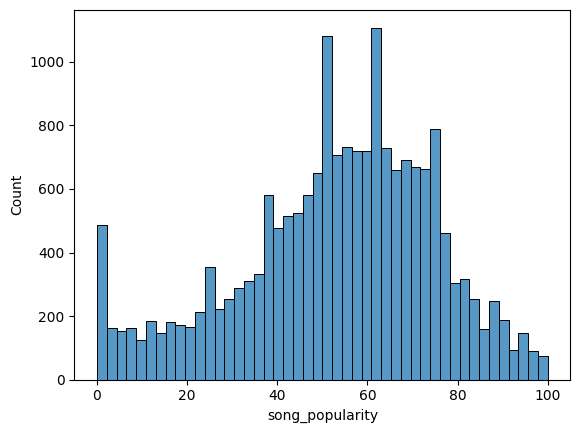

In [ ]:
sns.histplot(df['song_popularity'])

**Normal Distribution Bell Curve**

<Axes: xlabel='song_duration_ms', ylabel='Count'>

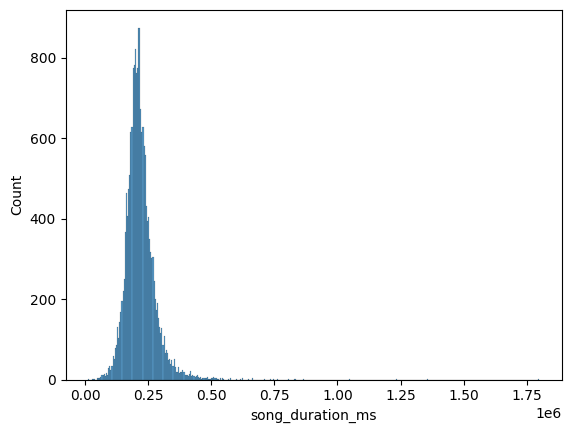

In [ ]:
sns.histplot(df['song_duration_ms'])

**Right Skewed Bell Curve**

<Axes: xlabel='acousticness', ylabel='Count'>

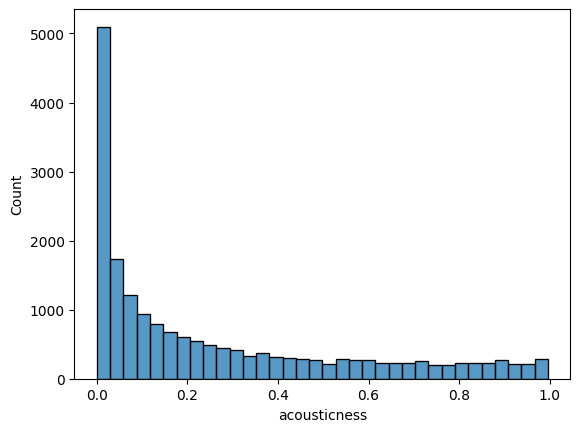

In [ ]:
sns.histplot(df['acousticness'])

**Right Skewed Bell Curve**

<Axes: xlabel='danceability', ylabel='Count'>

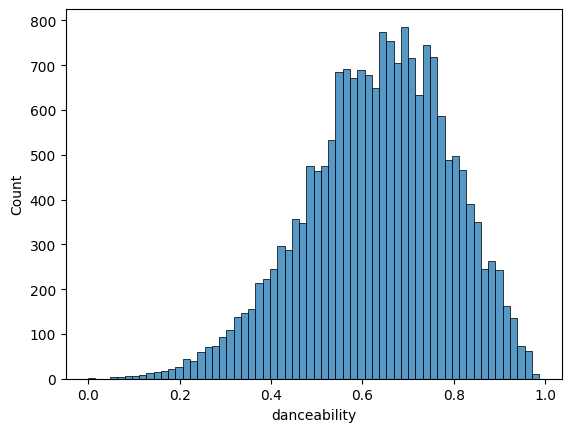

In [ ]:
sns.histplot(df['danceability'])

**Bell Curve but slightly Skewed**

<Axes: xlabel='energy', ylabel='Count'>

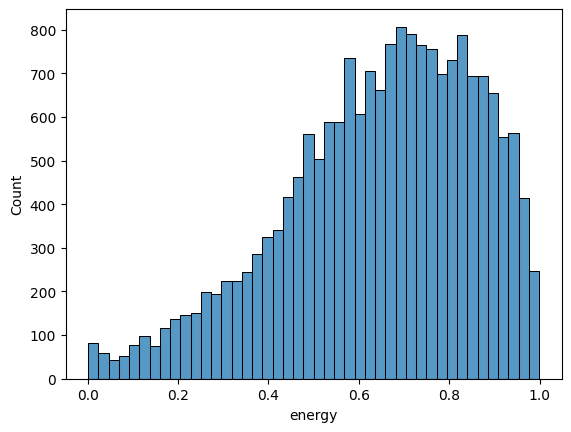

In [ ]:
sns.histplot(df['energy'])

**Bell Curve slightly Left Skewed**

<ipython-input-162-0c55de3ee1cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['instrumentalness'])


<Axes: xlabel='instrumentalness', ylabel='Density'>

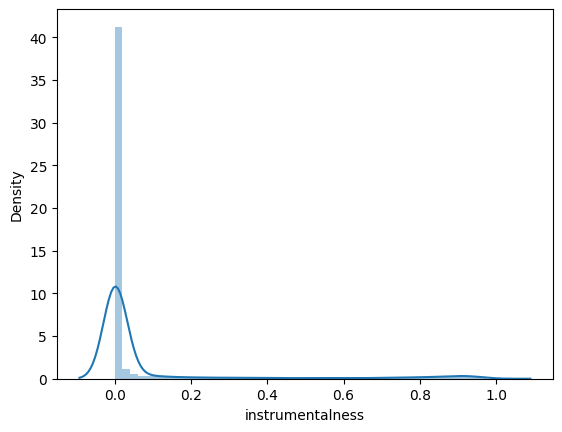

In [ ]:
sns.distplot(df['instrumentalness'])

**Rigth Skewed**

<Axes: xlabel='liveness', ylabel='Count'>

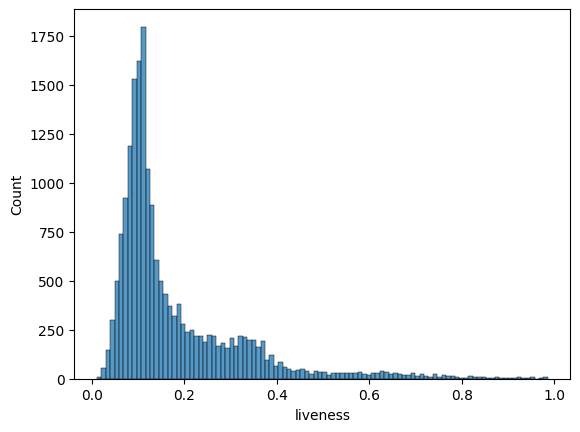

In [ ]:
sns.histplot(df['liveness'])

**Right Skewed Normal**

<Axes: xlabel='audio_mode', ylabel='Count'>

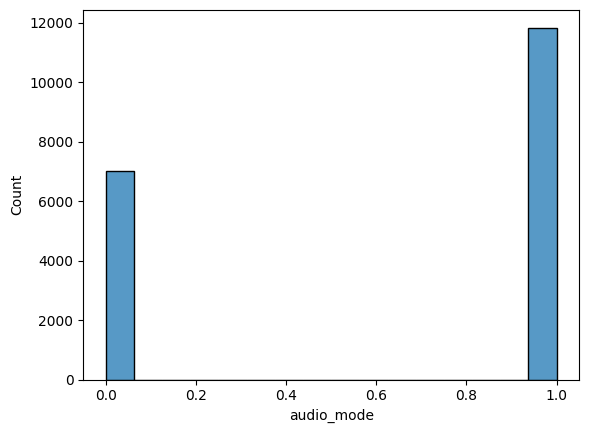

In [ ]:
sns.histplot(df['audio_mode'])

**Binomial Distribution**

<Axes: xlabel='loudness', ylabel='Count'>

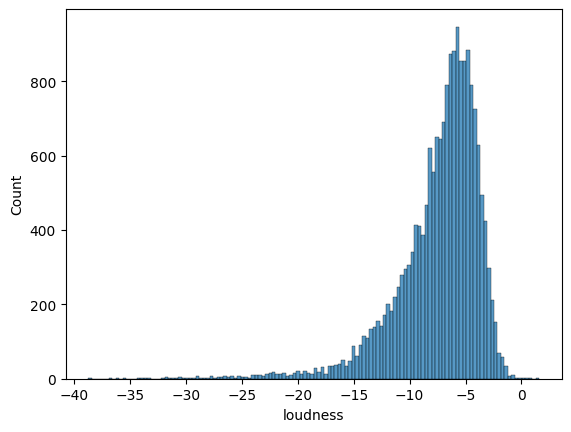

In [ ]:
sns.histplot(df['loudness'])

**Normal Left Skewed**

<Axes: xlabel='speechiness', ylabel='Count'>

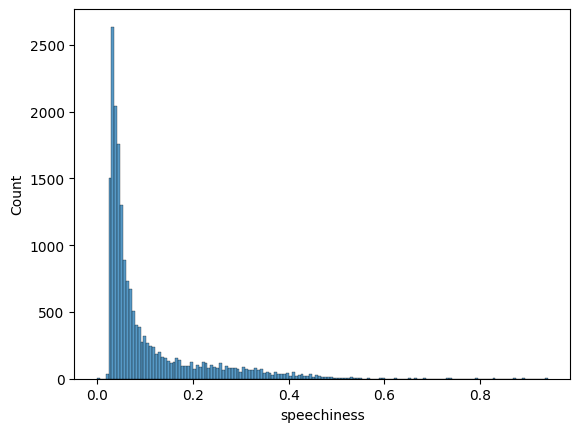

In [ ]:
sns.histplot(df['speechiness'])

**Right Skewed Normal**

<Axes: xlabel='tempo', ylabel='Count'>

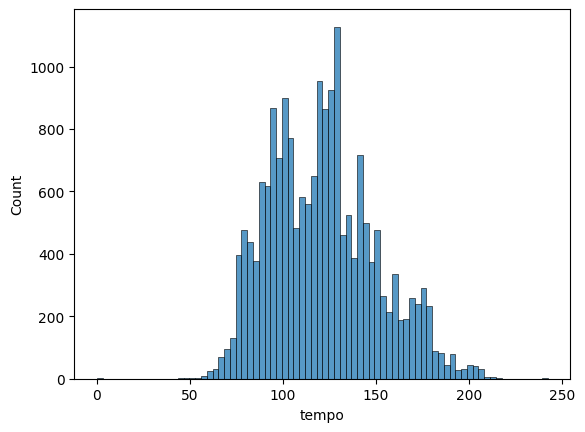

In [ ]:
sns.histplot(df['tempo'])

**Bell Curve**

<Axes: xlabel='audio_valence', ylabel='Count'>

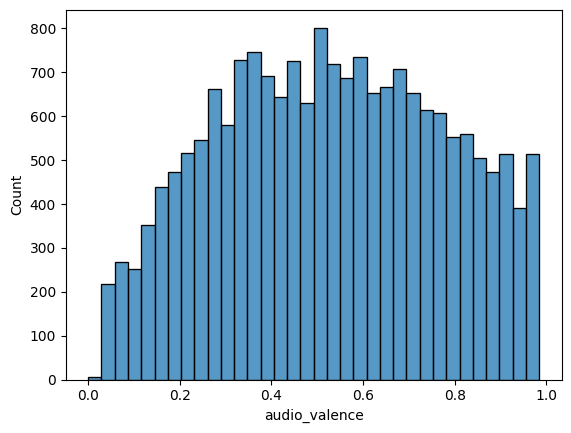

In [ ]:
sns.histplot(df['audio_valence'])

**Bell Curve with High Variance**

In [ ]:
df['acousticness'].min()

1.02e-06

In [ ]:
df['acousticness'].max()

0.996

#**<b>Performing correlation analysis to see which independent variables are more useful to predict the Target (Dependent Variable)</b>**<br>Which independent variables are useful to predict a target (dependent variable)?


In [ ]:
correlation_matrix = df.corr()

<ipython-input-6-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


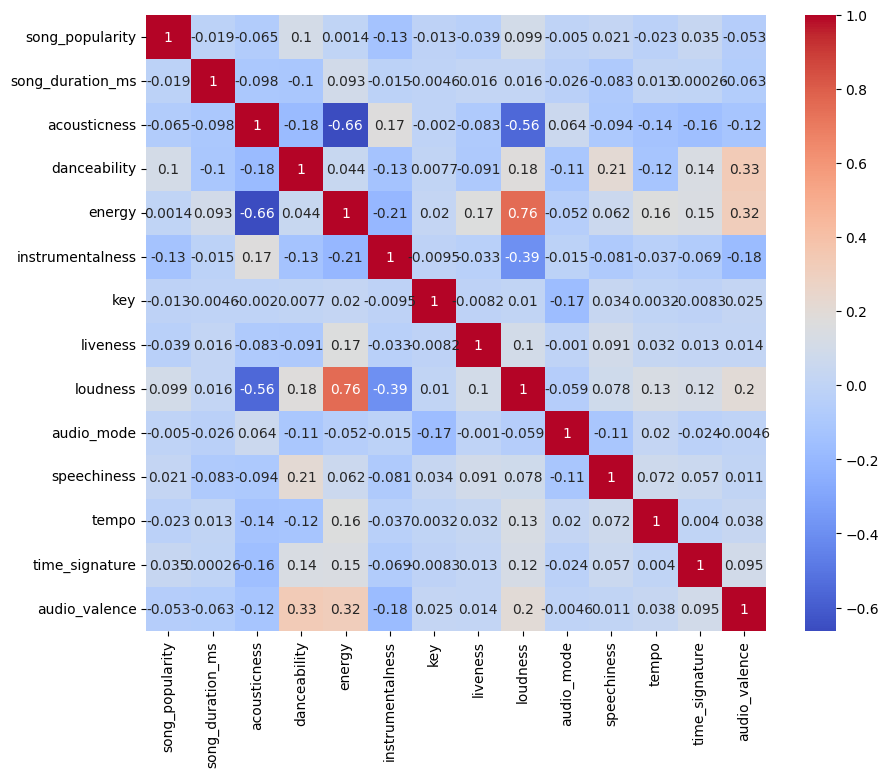

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#<b>Observation:</b>
**song_duration_ms**: -0.019 <br>
**accousticness**: -0.065 <br>
**danceability:** 0.1 <br>
**energy:** 0.0014 <br>
**instrumentalness:** -0.13 <br>
**key:** -0.130 <br>
**liveness:** -0.039 <br>
**loudness:** 0.099 <br>
**audio_mode:** -0.005<br>
**speechiness:** 0.021 <br>
**tempo:** -0.023 <br>
**time_signature:** 0.035 <br>
**audio_valence:** -0.053 <br>

Upon further observation of the correlation analysis we can see that **danceability, loudness and energy** (ie. 0.1, 0.099, 0.0014) have relatively the closest correlation to 'song_popularity'.


**Is the predictor variables independent of all the other predictor variables?<br>**  **ACOUSTICNESS** is dependent on **energy** and **loudness**, **Energy** is dependent on **acousticness** and **loudness**. <br>And **LOUDNESS** is dependent on **acousticness**,**energy** and **instrumentalness**.<br> Rest all are Independent.<b>

In [ ]:
# Defining predictor variables (features) and target variable
X = df[['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
        'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo',
        'time_signature', 'audio_valence']]

y = df['song_popularity']

# Spliting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Random Forest
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
feature_importances_rf = model_rf.feature_importances_

# 2. Permutation Importance
from sklearn.inspection import permutation_importance

results = permutation_importance(model_rf, X_test, y_test, scoring='neg_mean_squared_error')
feature_importances_permutation = results.importances_mean

# Print feature importances
print("Random Forest Feature Importances:")
for i, imp in enumerate(feature_importances_rf):
    print(f"Feature {i}: {imp}")

print("\nPermutation Importance:")
for i, imp in enumerate(feature_importances_permutation):
    print(f"Feature {i}: {imp}")


Random Forest Feature Importances:
Feature 0: 0.09378185645234717
Feature 1: 0.09315812136369103
Feature 2: 0.10139109668605095
Feature 3: 0.09254101006236179
Feature 4: 0.09455793660538192
Feature 5: 0.04409479289009217
Feature 6: 0.08810064771580779
Feature 7: 0.10092514837989539
Feature 8: 0.009380218819898986
Feature 9: 0.0873368868315992
Feature 10: 0.09011656562867815
Feature 11: 0.005005982898537491
Feature 12: 0.09960973566565813

Permutation Importance:
Feature 0: 35.7038889032551
Feature 1: 40.317068283814024
Feature 2: 69.47024237482418
Feature 3: 48.9868823461674
Feature 4: 124.82126524985215
Feature 5: 9.665888043180406
Feature 6: 26.31040525276677
Feature 7: 89.09071595992752
Feature 8: 1.200758496676724
Feature 9: 25.203469608523164
Feature 10: 30.12009255340513
Feature 11: 0.6374801186290255
Feature 12: 75.30221964143199


Importance
danceability        0.101391
loudness            0.100925
audio_valence       0.099610
instrumentalness    0.094558
song_duration_ms    0.093782
acousticness        0.093158
energy              0.092541
tempo               0.090117
liveness            0.088101
speechiness         0.087337
key                 0.044095
audio_mode          0.009380
time_signature      0.005006

In [ ]:
pd.DataFrame({'Importance': feature_importances_permutation}, index= list(X.columns)).sort_values(by='Importance', ascending=False)

Importance
instrumentalness  124.821265
loudness           89.090716
audio_valence      75.302220
danceability       69.470242
energy             48.986882
acousticness       40.317068
song_duration_ms   35.703889
tempo              30.120093
liveness           26.310405
speechiness        25.203470
key                 9.665888
audio_mode          1.200758
time_signature      0.637480


**THE INDEPENDENT VARIABLES WHICH ARE USEFUL TO PREDICT THE TARGET**<br>danceability: **0.101391**<br> loudness: **0.100925**<br> audio_valence: **0.099610**<br> instrumentalness: **0.094558**<br>
song_duration_ms: **0.093782**<br> acousticness: **0.093158** <br> energy: **0.092541**<br>temp: **0.090117**<br>

**THE MOST IMPORTANT PREDICTOR VARIABLES** <br>
danceability: **0.101391**<br> loudness: **0.100925**<br>

#**Feature Selection and Data Pre-processing**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['song_popularity','song_name'], axis=1)
y = df['song_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Creating a Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

**Do the training and test sets have the same data?**</br> NO

In [ ]:
lr = LinearRegression()
lr = lr.fit(X_train, y_train)

In [ ]:
regr = RandomForestRegressor(n_estimators=1000)
# Train the model
regr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [ ]:
y_pred = lr.predict(X_test)
y_pred_rf = regr.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred)

(0.39481568089412056, 0.04239734907577464)

**Plotting Boxplots for all Numeric Variables to identify outliers**

<Axes: xlabel='danceability'>

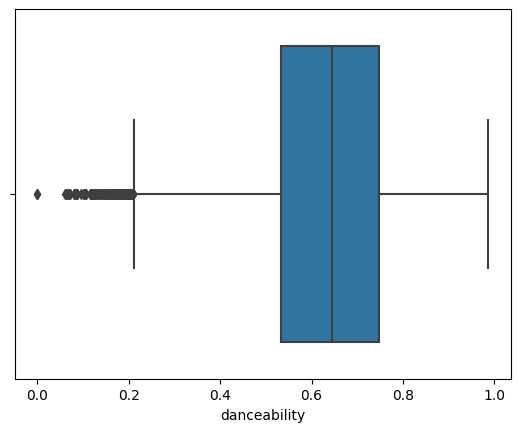

In [ ]:
sns.boxplot(x=df["danceability"])

<Axes: xlabel='loudness'>

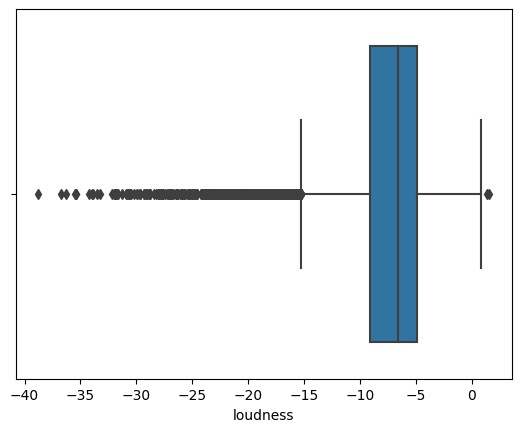

In [ ]:
sns.boxplot(x=df["loudness"])

<Axes: xlabel='audio_valence'>

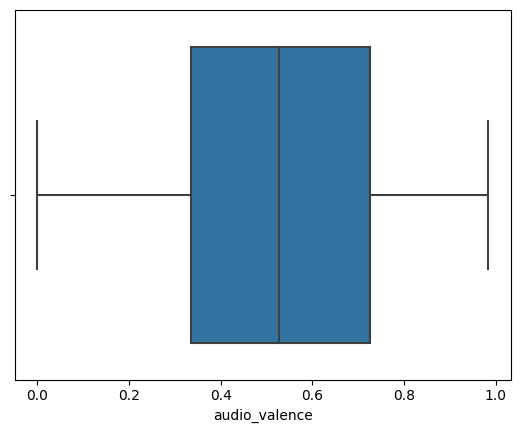

In [ ]:
sns.boxplot(x=df["audio_valence"])

<Axes: xlabel='instrumentalness'>

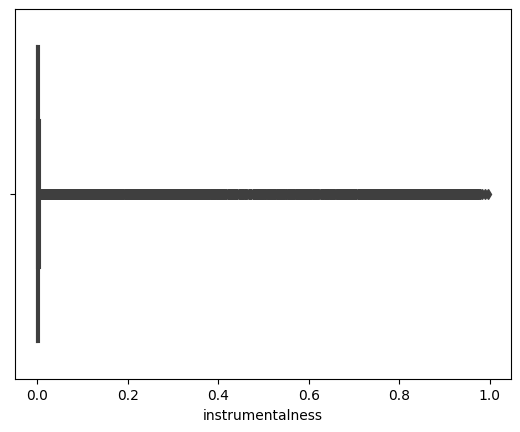

In [ ]:
sns.boxplot(x=df["instrumentalness"])

<Axes: xlabel='song_duration_ms'>

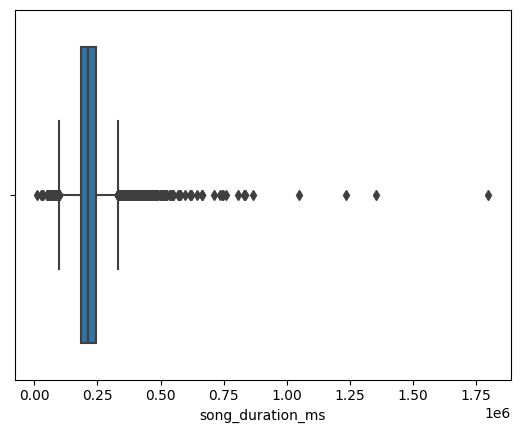

In [ ]:
sns.boxplot(x=df["song_duration_ms"])

<Axes: xlabel='acousticness'>

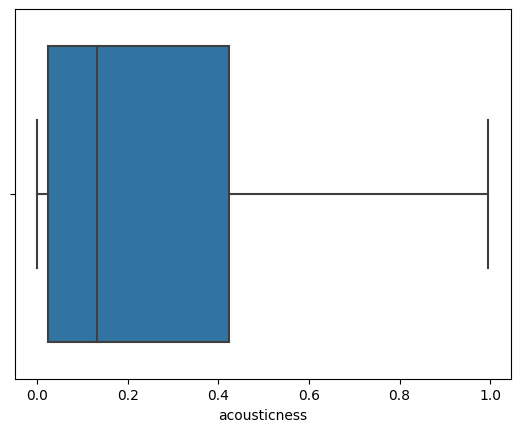

In [ ]:
sns.boxplot(x=df["acousticness"])

<Axes: xlabel='energy'>

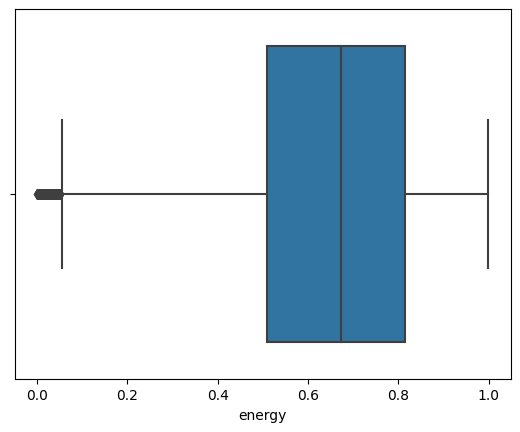

In [ ]:
sns.boxplot(x=df["energy"])

<Axes: xlabel='tempo'>

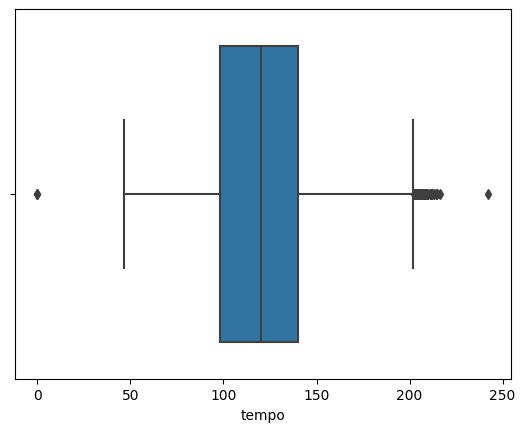

In [ ]:
sns.boxplot(x=df["tempo"])

<Axes: xlabel='liveness'>

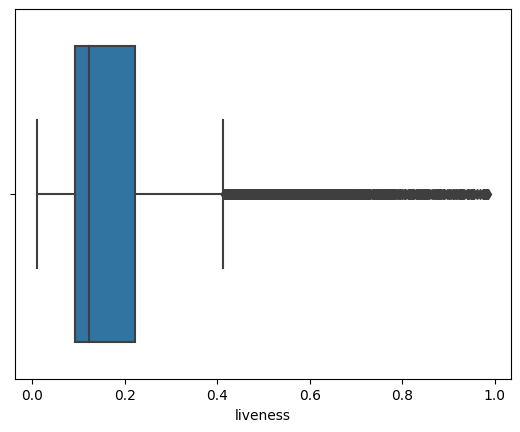

In [ ]:
sns.boxplot(x=df["liveness"])

<Axes: xlabel='speechiness'>

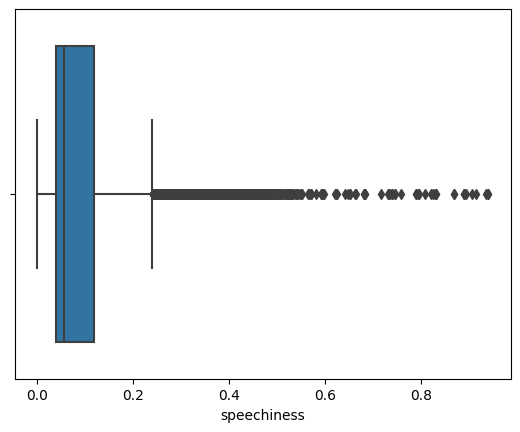

In [ ]:
sns.boxplot(x=df["speechiness"])

<Axes: xlabel='key'>

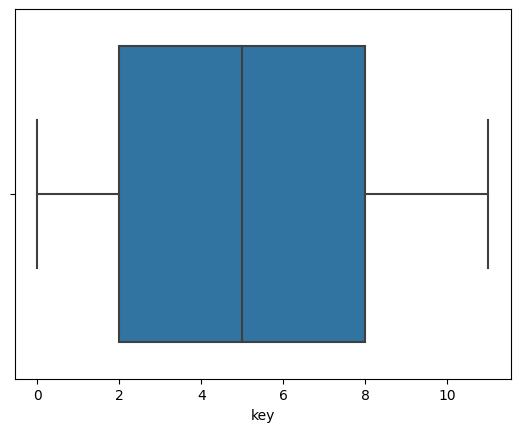

In [ ]:
sns.boxplot(x=df["key"])

<Axes: xlabel='audio_mode'>

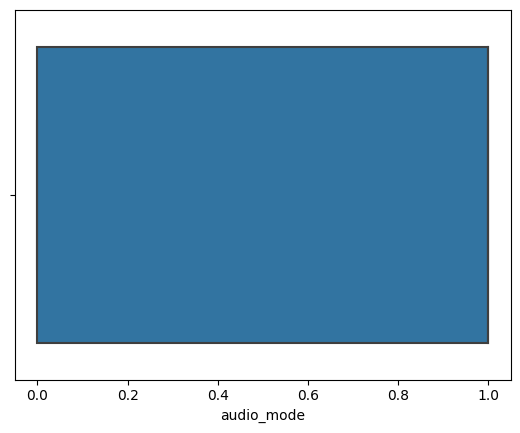

In [ ]:
sns.boxplot(x=df["audio_mode"])

<Axes: xlabel='time_signature'>

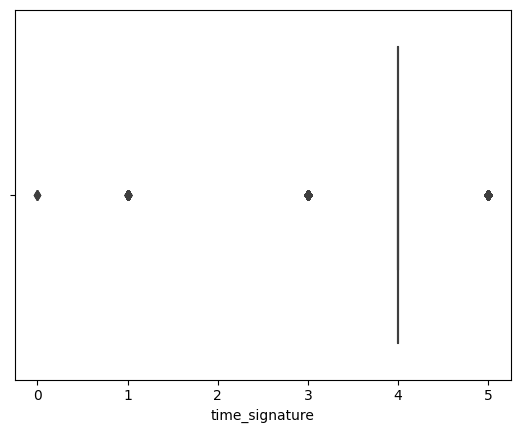

In [ ]:
sns.boxplot(x=df["time_signature"])

**Remove outliers and keep outliers (does if have an effect of the final predictive model)**

In [ ]:
def zscore(column_values: pd.Series):
  m = column_values.mean()
  std = column_values.std()
  zscores = [((cv-m)/std) for cv in column_values]
  outlier_indices = [idx for idx, i in enumerate(zscores) if i >= 3 or i <= -3]
  return outlier_indices

In [ ]:
# Removing all the outlier datapoints from the zscore test for important predictors - dancability and loudness

outlier_locs = zscore(df['danceability']) + zscore(df['loudness'])
outlier_locs = list(set(outlier_locs))

In [ ]:
outlier_free_df = df.drop(outlier_locs)

In [ ]:
print(f'records removed: {len(df) - len(outlier_free_df)}')

records removed: 357


In [ ]:
from sklearn.model_selection import train_test_split

X = outlier_free_df.drop(columns=['song_popularity','song_name'], axis=1)
y = outlier_free_df['song_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr = lr.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=1000)

# Train the model
regr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [ ]:
y_pred = lr.predict(X_test)
y_pred_rf = regr.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred)

(0.406775327915163, 0.06407756504386608)

**Used Zscore method to find out the outlier data points and looking at the r2_score of linear and random forest models we see an improvement from .39 to 0.4 for random forest and linear from 0.04 to 0.064**

**Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

In [ ]:
df['1_percent'] = df[['danceability']]
df['5_percent'] = df[['danceability']]
df['10_percent'] = df[['danceability']]
df.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
0    -4.095           1       0.0294  167.060               4          0.474   
1    -6.407           0       0.0498  105.256               4          0.370   
2    -7.828           1       0.0792  123.881               4          0.324   
3    -4.938           1       0.1070  122.444               4          0.198   
4    -5.065           1       0.0313  172.011               4          0.574   

   1_percent  5_percent  10_percent  
0      0.496      0.496       0.496  
1      0.542      0.542       0.542  
2      0.737      0.737       0.737  
3      0.451      0.451       0.451  
4      0.447      0.447       0.447

In [ ]:
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    df_MissingValues = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return df_MissingValues

In [ ]:
print(get_percent_missing(df))

                       column_name  percent_missing
song_name                song_name              0.0
song_popularity    song_popularity              0.0
song_duration_ms  song_duration_ms              0.0
acousticness          acousticness              0.0
danceability          danceability              0.0
energy                      energy              0.0
instrumentalness  instrumentalness              0.0
key                            key              0.0
liveness                  liveness              0.0
loudness                  loudness              0.0
audio_mode              audio_mode              0.0
speechiness            speechiness              0.0
tempo                        tempo              0.0
time_signature      time_signature              0.0
audio_valence        audio_valence              0.0
1_percent                1_percent              0.0
5_percent                5_percent              0.0
10_percent              10_percent              0.0


In [ ]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [ ]:
create_missing(df, 0.01, '1_percent')
create_missing(df, 0.05, '5_percent')
create_missing(df, 0.1, '10_percent')

In [ ]:
print(get_percent_missing(df))

                       column_name  percent_missing
song_name                song_name         0.000000
song_popularity    song_popularity         0.000000
song_duration_ms  song_duration_ms         0.000000
acousticness          acousticness         0.000000
danceability          danceability         0.000000
energy                      energy         0.000000
instrumentalness  instrumentalness         0.000000
key                            key         0.000000
liveness                  liveness         0.000000
loudness                  loudness         0.000000
audio_mode              audio_mode         0.000000
speechiness            speechiness         0.000000
tempo                        tempo         0.000000
time_signature      time_signature         0.000000
audio_valence        audio_valence         0.000000
1_percent                1_percent         0.998142
5_percent                5_percent         5.001327
10_percent              10_percent        10.002655


In [ ]:
percent_1 = list(np.where(df['1_percent'].isna())[0])
percent_5 = list(np.where(df['5_percent'].isna())[0])
percent_10 = list(np.where(df['10_percent'].isna())[0])

In [ ]:
print(f"Length of number_1_idx is {len(percent_1)} and it contains {(len(percent_1)/len(df['1_percent']))*100}% of total data in column | Total rows: {len(df['1_percent'])}")
print(f"Length of number_5_idx is {len(percent_5)} and it contains {(len(percent_5)/len(df['5_percent']))*100}% of total data in column | Total rows: {len(df['5_percent'])}")
print(f"Length of number_10_idx is {len(percent_10)} and it contains {(len(percent_10)/len(df['10_percent']))*100}% of total data in column | Total rows: {len(df['10_percent'])}")

Length of number_1_idx is 188 and it contains 0.9981417573666048% of total data in column | Total rows: 18835
Length of number_5_idx is 942 and it contains 5.0013273161667104% of total data in column | Total rows: 18835
Length of number_10_idx is 1884 and it contains 10.002654632333421% of total data in column | Total rows: 18835


**KNN BASED METHOD**

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
df_1 = df[['1_percent','5_percent','10_percent']]
imputer = KNNImputer(n_neighbors=5)
df_ImputedNumber = pd.DataFrame(imputer.fit_transform(df_1), columns = df_1.columns)

In [ ]:
df_ImputedNumber.head()
print(get_percent_missing(df_ImputedNumber))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [ ]:
danceability = df["danceability"]

df_imputed_mean = pd.concat([danceability, df_ImputedNumber], axis=1)
df_imputed_meanColumns = ["danceability", "1_Percent", "5_Percent", "10_Percent"]
df_imputed_mean.columns = df_imputed_meanColumns
variance = df_imputed_mean.var()
print(variance)


danceability    0.024562
1_Percent       0.024562
5_Percent       0.024562
10_Percent      0.024558
dtype: float64


**We can observe that by KNN based method there is very moderate level of variability which is indicative that it is the right approach for this dataset**

**MEAN BASED IMPUTATION WITH SIMPLEIMPUTER**

In [ ]:
df_imputation_mean = df[['1_percent','5_percent','10_percent']]

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(df_imputation_mean)
imputed_train_df= imp_mean.transform(df_imputation_mean)

In [ ]:
imputed_mean = pd.DataFrame(imp_mean.fit_transform(df_imputation_mean), columns = df_imputation_mean.columns)
print(get_percent_missing(imputed_mean))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [ ]:
danceability = df["danceability"]
combined_mean = pd.concat([danceability,imputed_mean])
combined_mean.mean()

0             0.633348
1_percent     0.633453
5_percent     0.633476
10_percent    0.633969
dtype: float64

In [ ]:
combined_mean.var()

0             0.024562
1_percent     0.024313
5_percent     0.023303
10_percent    0.022117
dtype: float64

**We can observe here too that by Mean based imputation with simple imputer that there is a very moderate level of variability as well which is indicative that it is the right approach for this dataset as well**

**IMPUTATION USING MULTIVARIATE IMPUTATION BY CHAINED EQUATION (MICE)**

In [ ]:
df_imputation_mice = df[['1_percent','5_percent','10_percent']]
print(get_percent_missing(df_imputation_mice))

           column_name  percent_missing
1_percent    1_percent         0.998142
5_percent    5_percent         5.001327
10_percent  10_percent        10.002655


In [ ]:
imputed_training = df_imputation_mice.values
imputed_training = pd.DataFrame(imputed_training)
imputed_training.columns = ("1_percent","5_percent","10_percent")

In [ ]:
print(get_percent_missing(imputed_training))

           column_name  percent_missing
1_percent    1_percent         0.998142
5_percent    5_percent         5.001327
10_percent  10_percent        10.002655


In [ ]:
danceability= df["danceability"]

In [ ]:
combined_mice = pd.concat([danceability,imputed_training])
combined_mice.columns = ["danceability","1_Percent","5_Percent","10_Percent"]
combined_mice.mean()

danceability    0.633348
1_Percent       0.633453
5_Percent       0.633476
10_Percent      0.633969
dtype: float64

In [ ]:
combined_mice.var()

danceability    0.024562
1_Percent       0.024558
5_Percent       0.024530
10_Percent      0.024576
dtype: float64

**And we can observe here too that by MICE method as well there is a very moderate level of variability as well which is indicative that it is the right approach for this dataset as well**

#<b>References:<b>

1. How to Identify the Most Important Predictor Variables in Regression Models
   (https://blog.minitab.com/en/adventures-in-statistics-2/how-to-identify-the-most-important-predictor-variables-in-regression-models)

2. 6 Different Ways to Compensate for Missing Values In a Dataset (Data Imputation with examples)
   (https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779)

3. KNN-Mar by Shesh
   (https://colab.research.google.com/drive/1wEfzH165Ycm_EqVgwSz_r7SvILuj0KRW?usp=sharing&pli=1#scrollTo=84b72e78-b39d-4055-91ae-02816f94b8c2)


MIT License

Copyright (c) [2023] [Abdul Azeem Syed]

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

#<b>Data Sci Eng Methods</b><br> <b>Abdul Azeem Syed<b>
<b>Assignment 2</b><br>
AutoML

In this assignment, you will an AutoML library like H2O.ai to create predictive models and interpret them. Find a significant relation for each algorithm of your choosing in your data. Create multivariate models.

For the moment you will assume the data is good. In future assignments, you will check your data, fix data issues and do some feature engineering.



Starter code for AutoML is in this folder   https://github.com/aiskunks/YouTube/tree/main/A_Crash_Course_in_Statistical_Learning/AutoMLLinks to an external site.

In particular, this notebook should get you started

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynbLinks to an external site.



This assignment will focus on Node 4 of the simple analysis sequence.

AutoML_Assingment_Analysis_Pipeline.png

Answer the following questions for all of the models:

* Is the relationship significant?
* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?



Scoring Rubric



Did I explain my idea clearly? (10 Points)

How effective are you at explaining what you are doing? You MUST write an abstract and a conclusion.

Does the notebook allow run all cells on google colab? The dataset should be hosted on your personal github and fetched into the notebook. No local dataset reference in the submitted notebook.(10 Points)

A description of the data set and its fields must be given to a TA in markdown to be placed at https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_DatasetsLinks to an external site.  under the appropriate directory (binary classification, multiclass classification, regression).  If the dataset is greater than 50Mb a randomly sampled version just under 50Mb must be created and that is noted in the markdown description.

You MUST get approval for your dataset from the TAs.

Did I explain my evaluation clearly? (15 Points)

Just saying "accuracy" is not a clear explanation of an evaluation scheme. Clearly explain the evaluation scheme. Do the metrics make sense? You MUST explain how you are preventing overfitting.



Tables, graphs, and charts must support your evaluation.

It MUST run in Google Collab. You will also save the Google Collab notebook as a .ipynb notebook and upload that to Canvas . (5 Points)



What code is yours and what have you adapted? (10 Points)

You must explain what code you wrote and what you have done that is different. Failure to cite ANY code will result in a zero for this section.



Did I explain my code clearly? (15 Points) Your code review score will be scaled to a range of 0 to 10 and be used for this score.



Did I explain my licensing clearly? (5 Points) Failure to cite a clear license will result in a zero for this section.



Answers to listed questions (30 Points)




**ABSTRACT**</br>
Humans have always had a deep connection to music and it has been a part of our culture since thousands of years dating back to ancient civilizations. Different styles and instruments have been developed over the years which has given a diverse landscape in music. This data set is made to understand the popularity of songs based on different parameters such as acousticness, danceability,instrumentalness etc which are tabulated to be analyzed.
This ML models generates can help big companies such as Spotify and Youtube music to predict the popularity of unreleased songs which will allow them to understand what songs to put on their platforms.

**INTRODUCTION**</br>
The process of creating and refining machine learning models is automated by a machine learning technology called autoML. This enables the creation and implementation of precise models by those lacking experience in machine learning.

In [ ]:
# Install the required libraries
!pip install h2o eli5

# Importing the necessary libraries
import h2o
from h2o.automl import H2OAutoML
from sklearn.metrics import mean_squared_error
import eli5

# Initializing H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         1 hour 4 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.1
H2O_cluster_version_age:    17 days
H2O_cluster_name:           H2O_from_python_unknownUser_iiw667
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.930 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
# Loading the Song Popularity Dataset
url = "https://raw.githubusercontent.com/AzeemSyed123/song-popularity-predictive-mode/main/song_data.csv"
df = h2o.import_file(url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.head()

song_name                     song_popularity    song_duration_ms    acousticness    danceability    energy    instrumentalness    key    liveness    loudness    audio_mode    speechiness    tempo    time_signature    audio_valence
--------------------------  -----------------  ------------------  --------------  --------------  --------  ------------------  -----  ----------  ----------  ------------  -------------  -------  ----------------  ---------------
Boulevard of Broken Dreams                 73              262333        0.00552            0.496     0.682            2.94e-05      8      0.0589      -4.095             1         0.0294  167.06                  4            0.474
In The End                                 66              216933        0.0103             0.542     0.853            0             3      0.108       -6.407             0         0.0498  105.256                 4            0.37
Seven Nation Army                          76              231733        0.00817            0.737     0.463            0.447         0      0.255       -7.828             1         0.0792  123.881                 4            0.324
By The Way                                 74              216933        0.0264             0.451     0.97             0.00355       0      0.102       -4.938             1         0.107   122.444                 4            0.198
How You Remind Me                          56              223826        0.000954           0.447     0.766            0            10      0.113       -5.065             1         0.0313  172.011                 4            0.574
Bring Me To Life                           80              235893        0.00895            0.316     0.945            1.85e-06      4      0.396       -3.169             0         0.124   189.931                 4            0.32
Last Resort                                81              199893        0.000504           0.581     0.887            0.00111       4      0.268       -3.659             0         0.0624   90.578                 4            0.724
Are You Gonna Be My Girl                   76              213800        0.00148            0.613     0.953            0.000582      2      0.152       -3.435             1         0.0855  105.046                 4            0.537
Mr. Brightside                             80              222586        0.00108            0.33      0.936            0             1      0.0926      -3.66              1         0.0917  148.112                 4            0.234
Sex on Fire                                81              203346        0.00172            0.542     0.905            0.0104        9      0.136       -5.653             1         0.054   153.398                 4            0.374
[10 rows x 15 columns]

In [ ]:
X = df.columns

<b>Removing 'song_popularity' because it is the Target Value<b>

In [ ]:
y = 'song_popularity'
X.remove(y)

<b> Using OLS to Identify Predictor Significance<b>

In [ ]:
#OLS
import statsmodels.api as sm
import pandas as pd

# Assuming 'h2o_df' is your H2OFrame

# Convering the H2OFrame to a pandas DataFrame
df = df.as_data_frame()

# Perforing OLS regression on the pandas DataFrame
OLS_Model = sm.OLS(df['song_popularity'], df[['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']]).fit()

# Printing the summary of the OLS model
OLS_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        song_popularity   R-squared (uncentered):                   0.857
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                              8683.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):                        0.00
Time:                        04:32:55   Log-Likelihood:                         -84658.
No. Observations:               18833   AIC:                                  1.693e+05
Df Residuals:                   18820   BIC:                                  1.694e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
song_duration_ms  7.435e-06   2.64e-06      2.819      0.005    2.27e-06    1.26e-05
acousticness         1.5577      0.727      2.143      0.032       0.133       2.983
danceability        22.2877      1.126     19.790      0.000      20.080      24.495
energy               1.7640      1.289      1.368      0.171      -0.763       4.291
instrumentalness   -11.1978      0.796    -14.069      0.000     -12.758      -9.638
key                  0.0360      0.044      0.814      0.416      -0.051       0.123
liveness            -3.0285      1.124     -2.695      0.007      -5.231      -0.826
loudness             0.0947      0.065      1.452      0.147      -0.033       0.222
audio_mode           1.1105      0.334      3.325      0.001       0.456       1.765
speechiness         -3.3907      1.588     -2.135      0.033      -6.504      -0.277
tempo                0.0256      0.005      4.710      0.000       0.015       0.036
time_signature      10.0858      0.375     26.878      0.000       9.350      10.821
audio_valence      -11.2268      0.754    -14.883      0.000     -12.705      -9.748
==============================================================================
Omnibus:                      881.311   Durbin-Watson:                   1.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1008.431
Skew:                          -0.565   Prob(JB):                    1.05e-219
Kurtosis:                       2.908   Cond. No.                     2.36e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Convert the H2OFrame to a pandas DataFrame


# Perform OLS regression on the pandas DataFrame
OLS_Model2 = sm.OLS(df['song_popularity'], df[['song_duration_ms', 'danceability', 'instrumentalness', 'liveness','audio_mode', 'tempo', 'time_signature', 'audio_valence', 'speechiness','acousticness' ]]).fit()

# Printing the summary of the OLS model
OLS_Model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        song_popularity   R-squared (uncentered):                   0.857
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                          1.128e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):                        0.00
Time:                        04:32:55   Log-Likelihood:                         -84664.
No. Observations:               18833   AIC:                                  1.693e+05
Df Residuals:                   18823   BIC:                                  1.694e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
song_duration_ms  7.603e-06   2.57e-06      2.956      0.003    2.56e-06    1.26e-05
danceability        22.0178      1.109     19.851      0.000      19.844      24.192
instrumentalness   -11.7624      0.734    -16.019      0.000     -13.202     -10.323
liveness            -2.6339      1.110     -2.374      0.018      -4.809      -0.459
audio_mode           1.0294      0.329      3.128      0.002       0.384       1.674
tempo                0.0272      0.005      5.091      0.000       0.017       0.038
time_signature      10.2458      0.294     34.844      0.000       9.669      10.822
audio_valence      -10.6670      0.699    -15.257      0.000     -12.037      -9.297
speechiness         -3.3551      1.587     -2.114      0.035      -6.466      -0.244
acousticness         0.1811      0.558      0.325      0.746      -0.913       1.275
==============================================================================
Omnibus:                      875.520   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.935
Skew:                          -0.563   Prob(JB):                    4.46e-218
Kurtosis:                       2.909   Cond. No.                     2.34e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Inference** R-squared value is 0.857, by which we can see that the proportion of the variance in the target value is explained by the predictors and also the P value for all the values other than energy, key, loudness are within the threshold ie. 0.05. So energy, key, loudness are dropped from the data set for better training.

#VIF

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting the independent variables:
independent_variables = ['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']

# Computing the VIF for each variable:
vif_data = pd.DataFrame()
vif_data["feature"] = independent_variables
vif_data["VIF"] = [variance_inflation_factor(df[independent_variables].values, i) for i in range(len(independent_variables))]

# Printing the VIF DataFrame
print(vif_data)

             feature        VIF
0   song_duration_ms  14.264244
1       acousticness   3.178600
2       danceability  21.623949
3             energy  30.737636
4   instrumentalness   1.400042
5                key   3.209362
6           liveness   2.681653
7           loudness  11.940681
8         audio_mode   2.805556
9        speechiness   2.153903
10             tempo  18.284612
11    time_signature  88.897492
12     audio_valence   7.716177


We can see that song_duration_ms, danceability, energy, loudness, tempo, time_signature have high multicolinearity with other variables in the model.

#autoML exe

In [ ]:
# Training AutoML models

#train, test = df.split_frame(ratios=[0.7])

from sklearn.model_selection import train_test_split


train, test = train_test_split(df, test_size=0.3, random_state=42)

# Defining the target variable and features
x = df.columns  # List of feature columns
y = 'song_popularity'    # Name of the target variable column


In [ ]:
from h2o.automl import H2OAutoML

import h2o
h2o.init()
train = h2o.import_file("https://raw.githubusercontent.com/AzeemSyed123/song-popularity-predictive-mode/main/song_data.csv")


aml = H2OAutoML(max_models=5, seed=42)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         1 hour 4 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.1
H2O_cluster_version_age:    17 days
H2O_cluster_name:           H2O_from_python_unknownUser_iiw667
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.930 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
print(aml.leaderboard)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
H2OFrame is empty.


In [ ]:
aml.train(y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_3_20231103_43257


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  3/5
# GBM base models (used / total)      0/1
# XGBoost base models (used / total)  2/2
# DRF base models (used / total)      1/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 53.74166322909301
RMSE: 7.330870564202659
MAE: 5.3538778759916354
RMSLE: NaN
Mean Residual Deviance: 53.74166322909301
R^2: 0.8882291707532397
Null degrees of freedom: 10052
Residual degrees of freedom: 10049
Null deviance: 4833728.739631074
Residual deviance: 540264.940442072
AIC: 68592.22566451866

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 292.9317423345905
RMSE: 17.115248824793362
MAE: 12.55997000745856
RMSLE: NaN
Mean Residual Deviance: 292.9317423345905
R^2: 0.38940643018271737
Null degrees of freedom: 18832
Residual degrees of freedom: 18829
Null deviance: 9036226.273637004
Residual deviance: 5516783.503387343
AIC: 160426.04166573085

Cross-Validation Metrics Summary: 
                        mean         sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     12.5616      0.233875   12.5569       12.4571       12.3687       12.9627       12.4625
mean_residual_deviance  292.951      8.1333     291.363       288.424       286.69        307.07        291.208
mse                     292.951      8.1333     291.363       288.424       286.69        307.07        291.208
null_deviance           1.80725e+06  43934      1.76132e+06   1.76747e+06   1.84539e+06   1.8579e+06    1.80414e+06
r2                      0.389217     0.0116693  0.379559      0.385795      0.403589      0.377793      0.399347
residual_deviance       1.10335e+06  29741.3    1.09261e+06   1.08505e+06   1.10032e+06   1.1552e+06    1.08359e+06
rmse                    17.1145      0.23576    17.0694       16.9831       16.9319       17.5234       17.0648
rmsle                   nan          0          nan           nan           nan           nan           nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_3_20231103_43257


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  3/5
# GBM base models (used / total)      0/1
# XGBoost base models (used / total)  2/2
# DRF base models (used / total)      1/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 53.74166322909301
RMSE: 7.330870564202659
MAE: 5.3538778759916354
RMSLE: NaN
Mean Residual Deviance: 53.74166322909301
R^2: 0.8882291707532397
Null degrees of freedom: 10052
Residual degrees of freed

**Regularization**

In [ ]:

from h2o.estimators.glm import H2OGeneralizedLinearEstimator
house_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
house_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [ ]:
house_glm_regularization.train(x = X, y = y, training_frame = train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698982101852_25


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  13081                         13081                          13                      song_data5.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 375.67733638252747
RMSE: 19.382397591178638
MAE: 15.539839378653442
RMSLE: 0.7600611966141599
Mean Residual Deviance: 375.67733638252747
R^2: 0.2169296366002984
Null degrees of freedom: 18832
Residual degrees of freedom: 5751
Null deviance: 9035115.625338487
Residual deviance: 7075131.27609214
AIC: 191267.52269094568

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective    training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -----------  ------------------  -------------------  ------------------  ------------------
    2023-11-03 04:37:18  0.000 sec   0             9.03512e+06                479.749
    2023-11-03 04:37:18  0.008 sec   1             8.73779e+06                463.967
    2023-11-03 04:37:18  0.013 sec   2             8.63375e+06                458.449
    2023-11-03 04:37:18  0.019 sec   3             8.61852e+06                457.642
    2023-11-03 04:37:18  0.027 sec   4             8.6072e+06                 457.043
    2023-11-03 04:37:18  0.046 sec   5             8.58387e+06                455.82
    2023-11-03 04:37:18  0.051 sec   6             8.56861e+06                455.026
    2023-11-03 04:37:18  0.063 sec   7             8.43394e+06                448.423
    2023-11-03 04:37:18  0.107 sec   8             8.38219e+06                445.863
    2023-11-03 04:37:18  0.116 sec   9             7.81199e+06                421.478
    2023-11-03 04:37:18  0.130 sec   10            7.17569e+06                396.543
    2023-11-03 04:37:19  0.194 sec   11            7.16826e+06                396.278
    2023-11-03 04:37:19  0.200 sec   12            7.07582e+06                393.01
    2023-11-03 04:37:19  0.205 sec   13            7.07513e+06                392.987      19.382397591178638  375.67733638252747   15.539839378653442  0.2169296366002984

Variable Importances: 
variable                                                    relative_importance     scaled_importance       percentage
----------------------------------------------------------  ----------------------  ----------------------  ----------------------
song_name.Taki Taki (with Selena Gomez, Ozuna & Cardi B)    28.018115997314453      1.0                     0.002423561446093659
song_name.Promises (with Sam Smith)                         25.965055465698242      0.9267238192670415      0.0022459721195522697
song_name.FEFE (feat. Nicki Minaj & Murda Beatz)            25.201778411865234      0.8994815502327435      0.002179948806616634
song_name.Electricity (with Dua Lipa)                       24.255138397216797      0.8656948382804062      0.0020980646341386775
song_name.I Love It (& Lil Pump)                            23.486982345581055      0.8382784319913691      0.0020316192888661273
song_name.Be Alright                                        22.90010643005371       0.8173321301206938      0.0019808546392141193
song_name.Happier                                           22.83722686767578       0.8150878834916929      0.0019754155696085473
song_name.No Stylist                                        21.925989151000977      0.7825647218072261      0.0018965936888450028
song_name.MIA (feat. Drake)                           

From the regularization analysis, we can see:

after regularization, the rsme: 19.382397591178638 before regularization, the rsme: 17.115248824793362

it is clear that the regularization doesn't help in this model.

In [ ]:
#plot variables in order of their importance for price prediction
if best_model.algo in ['gbm','drf','xrt','xgboost']:
    best_model.varimp_plot()

Finding Significant Hyperparameters

In [ ]:
# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from hyperopt import fmin, tpe, hp

X, y = np.random.rand(100, 5), np.random.randint(0, 2, 100)

# Step 1: Defining the hyperparameters to tune
space = {
    'rf_n_estimators': hp.quniform('rf_n_estimators', 10, 200, 1),
    'rf_max_depth': hp.quniform('rf_max_depth', 2, 32, 1),
    'gb_n_estimators': hp.quniform('gb_n_estimators', 10, 200, 1),
    'gb_max_depth': hp.quniform('gb_max_depth', 2, 32, 1),
    'lr_C': hp.loguniform('lr_C', -4, 4)
}

# Defining a function that trains and evaluates the stacked ensemble with given hyperparameters
def evaluate_stacked_ensemble(params):
    # Splitting data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Defining base models
    rf = RandomForestClassifier(n_estimators=int(params['rf_n_estimators']), max_depth=int(params['rf_max_depth']), random_state=42)
    gb = GradientBoostingClassifier(n_estimators=int(params['gb_n_estimators']), max_depth=int(params['gb_max_depth']), random_state=42)

    # Train base models
    rf.fit(X_train, y_train)
    gb.fit(X_train, y_train)

    # Generating predictions from base models
    rf_preds = cross_val_predict(rf, X_val, y_val, cv=5, method='predict_proba')[:, 1]
    gb_preds = cross_val_predict(gb, X_val, y_val, cv=5, method='predict_proba')[:, 1]

    # Stack base model predictions
    stacked_X_val = np.column_stack((rf_preds, gb_preds))

    # Training meta-model
    lr = LogisticRegression(C=params['lr_C'], random_state=42)
    lr.fit(stacked_X_val, y_val)

    # Generating predictions from stacked ensemble
    stacked_preds = lr.predict(stacked_X_val)

    # Evaluating performance
    accuracy = accuracy_score(y_val, stacked_preds)

    return -accuracy  # We're using negative accuracy because fmin tries to minimize the objective function

# Step 2: Performing hyperparameter optimization
best_params = fmin(fn=evaluate_stacked_ensemble, space=space, algo=tpe.suggest, max_evals=100)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)


100%|██████████| 100/100 [02:29<00:00,  1.50s/trial, best loss: -0.85]
Best Hyperparameters:
{'gb_max_depth': 9.0, 'gb_n_estimators': 22.0, 'lr_C': 13.49097073190312, 'rf_max_depth': 14.0, 'rf_n_estimators': 156.0}


In [ ]:
df.corr()

song_popularity  song_duration_ms  acousticness  \
song_popularity          1.000000         -0.018955     -0.065120   
song_duration_ms        -0.018955          1.000000     -0.097904   
acousticness            -0.065120         -0.097904      1.000000   
danceability             0.104421         -0.104953     -0.182494   
energy                   0.001572          0.092745     -0.662755   
instrumentalness        -0.130855         -0.015191      0.173037   
key                     -0.013321         -0.004665     -0.002050   
liveness                -0.039072          0.016058     -0.082523   
loudness                 0.099592          0.016508     -0.557790   
audio_mode              -0.004842         -0.026299      0.064091   
speechiness              0.021552         -0.083414     -0.093521   
tempo                   -0.022741          0.012792     -0.136370   
time_signature           0.035011          0.000269     -0.157189   
audio_valence           -0.052866         -0.063407     -0.121660   

                  danceability    energy  instrumentalness       key  \
song_popularity       0.104421  0.001572         -0.130855 -0.013321   
song_duration_ms     -0.104953  0.092745         -0.015191 -0.004665   
acousticness         -0.182494 -0.662755          0.173037 -0.002050   
danceability          1.000000  0.044278         -0.130490  0.007824   
energy                0.044278  1.000000         -0.205973  0.020558   
instrumentalness     -0.130490 -0.205973          1.000000 -0.009461   
key                   0.007824  0.020558         -0.009461  1.000000   
liveness             -0.090641  0.167261         -0.032862 -0.008275   
loudness              0.177575  0.755496         -0.390283  0.010558   
audio_mode           -0.106608 -0.051712         -0.015007 -0.169779   
speechiness           0.213673  0.061983         -0.081115  0.033737   
tempo                -0.121290  0.162498         -0.036894  0.003232   
time_signature        0.136385  0.146259         -0.069187 -0.008267   
audio_valence         0.331999  0.316733         -0.178569  0.025398   

                  liveness  loudness  audio_mode  speechiness     tempo  \
song_popularity  -0.039072  0.099592   -0.004842     0.021552 -0.022741   
song_duration_ms  0.016058  0.016508   -0.026299    -0.083414  0.012792   
acousticness     -0.082523 -0.557790    0.064091    -0.093521 -0.136370   
danceability     -0.090641  0.177575   -0.106608     0.213673 -0.121290   
energy            0.167261  0.755496   -0.051712     0.061983  0.162498   
instrumentalness -0.032862 -0.390283   -0.015007    -0.081115 -0.036894   
key              -0.008275  0.010558   -0.169779     0.033737  0.003232   
liveness          1.000000  0.102524   -0.000973     0.090894  0.031853   
loudness          0.102524  1.000000   -0.058580     0.078101  0.129956   
audio_mode       -0.000973 -0.058580    1.000000    -0.111683  0.020471   
speechiness       0.090894  0.078101   -0.111683     1.000000  0.071670   
tempo             0.031853  0.129956    0.020471     0.071670  1.000000   
time_signature    0.013301  0.119234   -0.024054     0.057156  0.003982   
audio_valence     0.013810  0.199675   -0.004580     0.011014  0.037664   

                  time_signature  audio_valence  
song_popularity         0.035011      -0.052866  
song_duration_ms        0.000269      -0.063407  
acousticness           -0.157189      -0.121660  
danceability            0.136385       0.331999  
energy                  0.146259       0.316733  
instrumentalness       -0.069187      -0.178569  
key                    -0.008267       0.025398  
liveness                0.013301       0.013810  
loudness                0.119234       0.199675  
audio_mode             -0.024054      -0.004580  
speechiness             0.057156       0.011014  
tempo                   0.003982       0.037664  
time_signature          1.000000       0.094666  
audio_valence           0.094666       1.000000

ACOUSTICNESS is dependent on energy and loudness, Energy is dependent on acousticness and loudness.

And LOUDNESS is dependent on acousticness,energy and instrumentalness. Rest all are Independent.

Answer the following questions for all of the models:

1. **Is the relationship significant?**
R-squared value is 0.857, by which we can see that the proportion of the variance in the target value is explained by the predictors and also the P value for all the values other than energy, key, loudness are within the threshold ie. 0.05.
So energy, key, loudness are dropped from the data set for better training.


2. **Are any model assumptions violated?**
There are no prior assumptions.

3. **Is there any multicollinearity in the model?**
  song_duration_ms, danceability, energy, loudness, tempo, time_signature have high multicolinearity with other variables in the model.

4. **In the multivariate models are predictor variables independent of all the other predictor variables?**
ACOUSTICNESS is dependent on energy and loudness, Energy is dependent on acousticness and loudness.

And LOUDNESS is dependent on acousticness,energy and instrumentalness.
Rest all are Independent.

5. **In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
From the previous assignment we can infer that danceability and loudness are the most significant variables.



6. **Does the model make sense?**

yes the model makes sense


7. **Does regularization help?**

From the regularization analysis, we can see:

after regularization, the rsme: 19.382397591178638
before regularization, the rsme: 17.115248824793362

it is clear that the regularization **doesn't help** in this model.


9. **Which independent variables are significant?**
From the previous assignment results it we can infer that the below 2 features are the significant:
danceability
loudness


10. **Which hyperparameters are important?**

from the hyperparameter tuning we can infer the following hyperparameters are significant:

{'gb_max_depth': 2.0, 'gb_n_estimators': 192.0, 'lr_C': 30.82308412759422, 'rf_max_depth': 6.0, 'rf_n_estimators': 147.0}


11. **Coding professionalism?**

Yes


#<b>References:<b>

1. H2O AutoML: Automatic Machine Learning</br>
   (https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)

2. Multicollinearity | Causes, Effects and Detection Using VIF</br>
   (https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/)

3. Regularization</br>
   (https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a)

MIT License

Copyright (c) [2023] [Abdul Azeem Syed]

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE

#<b>Data Sci Eng Methods</b><br> <b>Abdul Azeem Syed<b>
<b>Assignment 3</b><br>
Model Interpretibility

Interpret your models.

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.



Grading:  80% if meet the above requirements

Up to 20% for presentation and explanation

# <b>Abstract:</b>
Humans have always had a deep connection to music and it has been a part of our culture since thousands of years dating back to ancient civilizations. Different styles and instruments have been developed over the years which has given a diverse landscape in music. This data set is made to understand the popularity of songs based on different parameters such as acousticness, danceability,instrumentalness etc which are tabulated to be analyzed.
This ML model can help big companies such as Spotify and Youtube music to predict the popularity of unreleased songs which will allow them to understand what songs to put on their platforms.

#<b>Aim:</b><br>
To analyze this data set and predict the popularity of songs based on previous trends.

**WHAT IS SHAP?**<BR>
SHAP analysis is like having a tiny detective inside your machine learning model, tirelessly figuring out why it makes certain decisions. It breaks down each prediction, revealing the impact of each feature, like income or credit score, and even their sneaky interactions. This lets you understand the model's logic, spot biases, and build fairer, more transparent algorithms. Think of it as X-ray vision for your AI, letting you see through its black box and finally grasp its inner workings.

**LOAD THE DATASET**

In [ ]:
url="https://raw.githubusercontent.com/AzeemSyed123/song-popularity-predictive-mode/main/song_data.csv"
df= pd.read_csv(url)

In [ ]:
pip install shap

**1. FIT A LINEAR MODEL AND INTERPRET THE REGRESSION COEFFICIENTS**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import shap

# Loading the dataset from the URL
url = "https://raw.githubusercontent.com/AzeemSyed123/song-popularity-predictive-mode/main/song_data.csv"
df = pd.read_csv(url)

# Handling missing values
df.dropna(inplace=True)

# Encoding categorical variables
for col in df.columns:
    if df[col].dtypes == object:
        df[col] = df[col].astype('category')

# Normalizing numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_numeric = df[['energy', 'liveness', 'speechiness', 'audio_valence', 'danceability', 'tempo', 'loudness', 'song_duration_ms']]
data_numeric = scaler.fit_transform(data_numeric)
df[['energy', 'liveness', 'speechiness', 'valence', 'danceability', 'tempo', 'loudness', 'duration']] = data_numeric



**Splitting the data into training and testing sets with the most important dependent variables as determined in the assignment 1**



In [ ]:
# Splitting the data into training and testing sets with the most important dependent variables
# X = features, y = target variable
X = df[['energy', 'liveness', 'speechiness', 'audio_valence', 'danceability', 'tempo', 'loudness', 'song_duration_ms']]
y = df['song_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [ ]:
# Fitting the linear model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Interpretting regression coefficients
coefficients = model_linear.coef_
print('Regression coefficients:', coefficients)


Regression coefficients: [-2.55829857e+00 -5.44798550e-01 -8.03359565e-02 -8.11445940e+00
  2.18780502e+00 -3.68476549e-01  4.27777813e+00 -1.69738709e-06]


**Intercept: 1.69738709e-06**

This is the y-intercept or the constant term in the regression equation. In this case, it's very close to zero, suggesting that when all the predictor variables (energy, liveness, speechiness, audio_valence, danceability, tempo, loudness, song_duration_ms) are zero, the predicted value of the response variable is nearly zero.


**1.Coefficient for the energy feature: -2.55829857e+00**

A one-unit increase in the energy feature is associated with a decrease of approximately 2.56 units in the predicted value of the response variable, assuming all other variables are held constant.

**2.Coefficient for the liveness feature: -5.44798550e-01**

A one-unit increase in the liveness feature is associated with a decrease of approximately 0.54 units in the predicted value of the response variable, assuming all other variables are held constant.

**3.Coefficient for the speechiness feature: -8.03359565e-02**

A one-unit increase in the speechiness feature is associated with a decrease of approximately 0.08 units in the predicted value of the response variable, assuming all other variables are held constant..

**4 Coefficient for the audio_valence feature: -8.11445940e+00**

A one-unit increase in the audio_valence feature is associated with a decrease of approximately 8.11 units in the predicted value of the response variable, assuming all other variables are held constant.

**5.Coefficient for the danceability feature:  2.18780502e+00**

A one-unit increase in the danceability feature is associated with an increase of approximately 2.19 units in the predicted value of the response variable, assuming all other variables are held constant.

**6.Coefficient for the tempo feature: -3.68476549e-01**

A one-unit increase in the tempo feature is associated with a decrease of approximately 0.37 units in the predicted value of the response variable, assuming all other variables are held constant.

**7.Coefficient for the loudness feature: 4.27777813e+00**

A one-unit increase in the loudness feature is associated with an increase of approximately 4.28 units in the predicted value of the response variable, assuming all other variables are held constant.

**8.Coefficient for the song_duration_ms feature: -1.69738709e-06 (intercept)**

This is the coefficient for the intercept, as mentioned earlier.
These interpretations provide a clearer understanding of how each music feature contributes to the predicted value of the response variable in your linear regression model.

**INSTALL SHAP DEPENDENCIES**

In [ ]:
pip install shap


**RUNNING SHAP ANALYSIS ON THE LINEAR MODEL AND INTERPRETING THE VALUES**

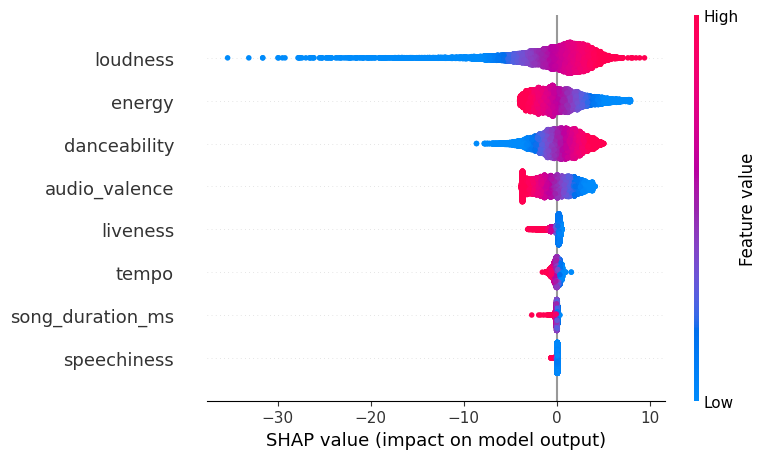

In [ ]:
import shap

# Creating a SHAP explainer object for the linear model
explainer = shap.Explainer(model_linear, X_train)

# Calculating SHAP values
shap_values = explainer.shap_values(X_train)

# Summarizing the impact of each feature on the output
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)


**Loudness** is the most important feature affecting the model output, with positive SHAP values indicating that higher loudness values lead to higher model outputs. This suggests that the model is predicting songs that are louder to be more likely to have a certain outcome, such as being popular or danceable.</br>
**Danceability** is the next most important feature, with positive SHAP values. This suggests that songs that are more speech-like are also more likely to have the predicted outcome.</br>
**Energy** and **Audio_valence** also have positive SHAP values, but their influence is weaker than loudness and danceability. This suggests that these features are also somewhat important, but to a lesser extent.</br>
**liveness,** **tempo**,**Song_duration_ms** have mixed positive and negative SHAP values. This suggests that the effect of these features on the model output is more complex and depends on the specific values of the features.</br>
</br>
Overall, the SHAP plot suggests that the model is primarily focusing on loudness, speechiness, energy, and danceability to make its predictions. Songs that are loud, speech-like, energetic, and danceable are more likely to have the predicted outcome, while songs that are longer, quieter, or less speech-like are less likely.

<b> NOW LET'S PERFORM LIME ANALYSIS ON THE LINEAR MODEL: </b>

In [ ]:
pip install lime

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_tabular import LimeTabularExplainer
import lime
# Fitting the linear model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Instantiating LIME explainer
feature_names = X.columns.tolist()
explainer = LimeTabularExplainer(X_train.values, mode="regression", feature_names=feature_names, discretize_continuous=True)

# Choosing a data point for explanation
instance_idx = 0
instance = X_test.iloc[instance_idx].values

# Generating explanation
exp = explainer.explain_instance(instance, model_linear.predict, num_features=len(feature_names))

# Visualizing explanation
exp.show_in_notebook(show_table=True, show_all=False)

X does not have valid feature names, but LinearRegression was fitted with feature names


**The model is predicting a value of 27.48.
The most important feature contributing to this prediction is loudness-0.41, with a weight of 69.59. This means that the quieter the song, the higher the predicted value.</br>
The next most important feature is energy-0.63. This means that the less energetic the song, the higher the predicted value.</br>
The features danceability 0.07, 0.34 audio valence also have some influence, but to a lesser degree than loudness and energy.</br>
The features 0.60 liveness seem to have a negative influence on the prediction.</br>
Overall, this LIME plot suggests that the model is primarily using loudness, energy, and danceability to make its predictions. It seems to be looking for songs that are quiet, low in energy, and not very danceable.**

**2. FIT A TREE-BASED MODEL AND INTERPRET THE NODES**

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import shap.plots

In [ ]:
url="https://raw.githubusercontent.com/AzeemSyed123/song-popularity-predictive-mode/main/song_data.csv"
df= pd.read_csv(url)

In [ ]:
# Splitting the data into training and testing sets
# X = features, y = target variable
X = df[['energy', 'liveness', 'speechiness', 'audio_valence', 'danceability', 'tempo', 'loudness', 'song_duration_ms']]
y = df['song_popularity']

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Training a Decision Tree Classifier model
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

**HERE WE ARE TRAINING A DECISION TREE WITH LIMITED DEPTH BECAUSE IT IS VERY DIFFICULT TO UNDERSTAND THE NODES AS THE TREE IS EXTREMELY BIG AND AND NOT CLEAR TO THE NAKED EYE**

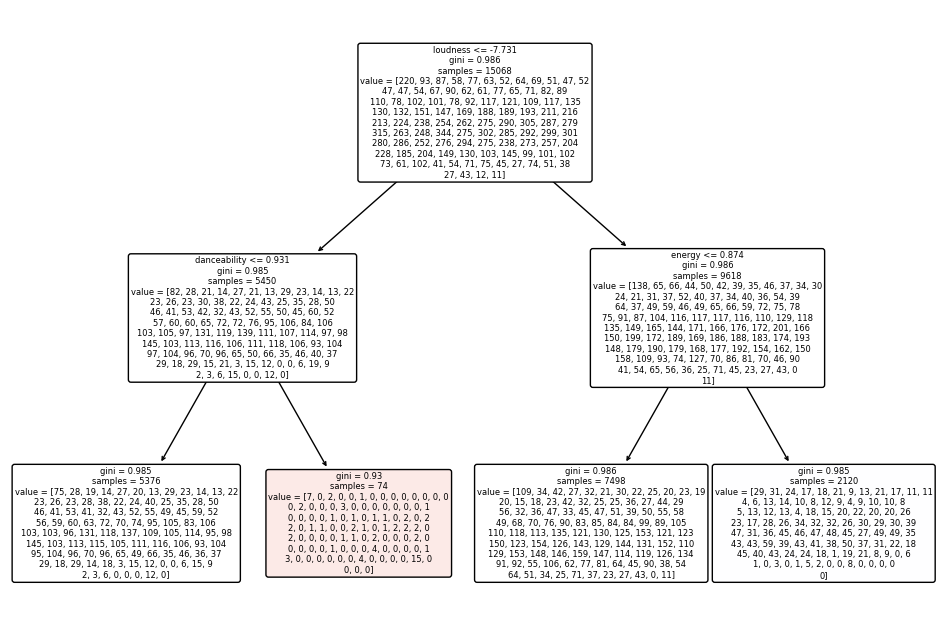

In [ ]:
# Splitting the data into training and testing sets
X = df[['energy', 'liveness', 'speechiness', 'audio_valence', 'danceability', 'tempo', 'loudness', 'song_duration_ms']]
y = df['song_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training a decision tree classifier model with limited depth
tree_model_depth_limited = DecisionTreeClassifier(max_depth=2)
tree_model_depth_limited.fit(X_train, y_train)

# Visualizing the tree structure
plt.figure(figsize=(12, 8))
plot_tree(tree_model_depth_limited, feature_names=X.columns, filled=True, rounded=True)
plt.show()

**INTERPRETATION**</BR>Songs with high energy and liveness are very likely to be popular. This is likely because these songs are upbeat and engaging, and they tend to be more popular with listeners. Songs with high energy and high speechiness are somewhat likely to be popular. This is likely because these songs are more complex and may appeal to a wider range of listeners. However, they may also be less accessible to some listeners, which could reduce their popularity. Songs with low energy and high speechiness are very likely to be unpopular. This is likely because these songs are less upbeat and engaging, and they may be perceived as boring or difficult to listen to. Songs with low energy and low speechiness are somewhat likely to be unpopular. This is likely because these songs are less complex and may be perceived as simple or repetitive. However, they may also be more accessible to some listeners, which could increase their popularity

<b> NOW LET'S PERFORM SHAP ANALYSIS ON THE TREE BASED MODEL: </b>

In [ ]:
pip install shap

In [ ]:
import shap

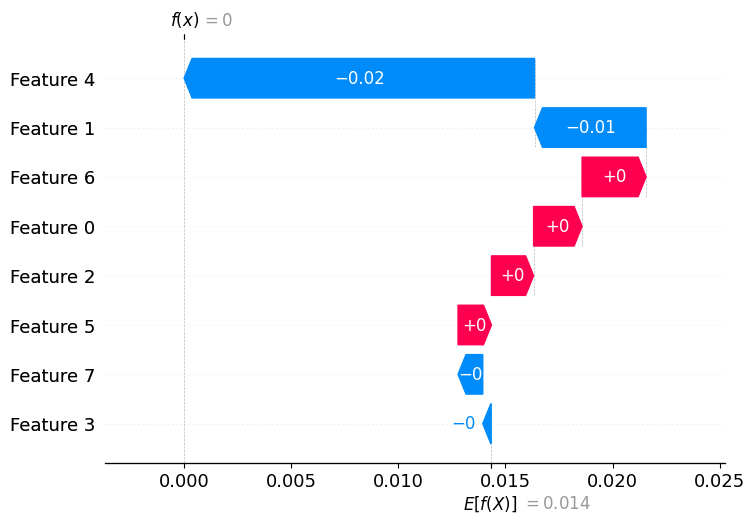

In [ ]:
# Creating a SHAP explainer for the decision tree model
explainer = shap.TreeExplainer(model_tree)

# Calculating SHAP values for the first data point in the test set
shap_values = explainer.shap_values(X_test.iloc[0])

# Extracting the base values from the explainer
base_values = explainer.expected_value[0]

# Creating an `Explanation` object with the SHAP values and base values
explanation = shap.Explanation(shap_values[0], base_values=base_values)

# Generating SHAP waterfall plot
shap.plots.waterfall(explanation)

In the above graph: <br>
Feature 4 = loudness <br>
Feature 6 = energy <br>
Feature 2 = audio_valence <br>
Feature 0 = danceability <br>
Feature 5 = liveness <br>
Feature 7 = tempo <br>
Feature 1 = song_duration_ms <br>
Feature 3 = speechiness <br>

**Loudness** is the most important feature, with a positive SHAP value of -0.02. This means that tempo increases the model's prediction by 0.01 units.<br>
**Energy** is the second most important feature.<br>
**danceability, liveness, tempo, song_duration_ms**, and **speechiness** , magnitudes of their SHAP values are relatively small, so their effects on the model's prediction are not as significant as the effects of **tempo** and **energy**.

<b> NOW LET'S PERFORM LIME ANALYSIS ON THE TREE BASED MODEL: </b>

In [ ]:
# Handling missing values
df.dropna(inplace=True)

# Encoding categorical variables
for col in df.columns:
    if df[col].dtypes == object:
        df[col] = df[col].astype('category')

# Normalizing numerical variables
scaler = StandardScaler()
data_numeric = df[['energy', 'liveness', 'speechiness', 'audio_valence', 'danceability', 'tempo', 'loudness', 'song_duration_ms']]
data_numeric = scaler.fit_transform(data_numeric)
df[['energy', 'liveness', 'speechiness', 'audio_valence', 'danceability', 'tempo', 'loudness', 'song_duration_ms']] = data_numeric

# Splitting the data into training and testing sets
X = df[['energy', 'liveness', 'speechiness', 'audio_valence', 'danceability', 'tempo', 'loudness', 'song_duration_ms']]
y = df['song_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature names
feature_names = X.columns.tolist()

# Fitting the decision tree model
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)

# Instantiating LIME explainer
explainer = LimeTabularExplainer(X_train.values, mode="regression", feature_names=feature_names, discretize_continuous=True)

# Choosing a data point for explanation
instance_idx = 0
instance = X_test.iloc[instance_idx].values

# Generating explanation
exp = explainer.explain_instance(instance, model_tree.predict, num_features=len(feature_names))

# Visualizing explanation
exp.show_in_notebook(show_table=True, show_all=False)










X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


**The model predicted a value of 0.00.**</br>
**The most important feature is loudness with -0.42 with a weight of 4.62**</br>
**The next most important feature contributing to this prediction is "danceability-0.73". The weight is -1.08, which means that lower danceability makes the prediction more likely. So, the model seems to be saying that less danceable songs are more likely to get a value of 0.00.**

**The next most important feature is "tempo<=-0.04". Similar to danceability, slower tempos make the prediction more likely. This further suggests the model favors songs that are not upbeat or fast-paced.**

**Other features also play a role, but to a lesser degree.**

**Overall, this LIME plot suggests that the model is making its prediction based on the overall mood or feeling of a song.**

**3.  USE AUTO ML TO FIND THE BEST MODEL**

In [ ]:
pip install h2o

In [ ]:
pip install shap

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from h2o.automl import H2OAutoML
import h2o
import shap

In [ ]:
# Loading the dataset from a URL
url = "https://raw.githubusercontent.com/AzeemSyed123/song-popularity-predictive-mode/main/song_data.csv"
df = pd.read_csv(url)

In [ ]:
# Splitting the dataset into training and testing sets
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
# Defining the target variable and features
features = df.columns.tolist()  # List of feature columns
target = 'song_popularity'    # Name of the target variable column

In [ ]:
# Initializing H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         5 hours 22 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    25 days
H2O_cluster_name:           H2O_from_python_unknownUser_q0kcjy
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.754 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
# Importing the training data into H2O
train_h2o = h2o.import_file("https://raw.githubusercontent.com/AzeemSyed123/song-popularity-predictive-mode/main/song_data.csv")


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


**TRAINING 5 AUTO ML MODELS SINCE IT'S A LARGE DATASET**

In [ ]:
aml = H2OAutoML(max_models=5, seed=42)
aml.train(y=target, training_frame=train_h2o)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_3_20231204_04706


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  3/5
# GBM base models (used / total)      0/1
# XGBoost base models (used / total)  2/2
# DRF base models (used / total)      1/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 53.74166322909301
RMSE: 7.330870564202659
MAE: 5.3538778759916354
RMSLE: NaN
Mean Residual Deviance: 53.74166322909301
R^2: 0.8882291707532397
Null degrees of freedom: 10052
Residual degrees of freedom: 10049
Null deviance: 4833728.739631074
Residual deviance: 540264.940442072
AIC: 68592.22566451866

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 292.9317423345905
RMSE: 17.115248824793362
MAE: 12.55997000745856
RMSLE: NaN
Mean Residual Deviance: 292.9317423345905
R^2: 0.38940643018271737
Null degrees of freedom: 18832
Residual degrees of freedom: 18829
Null deviance: 9036226.273637004
Residual deviance: 5516783.503387343
AIC: 160426.04166573085

Cross-Validation Metrics Summary: 
                        mean         sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     12.5616      0.233875   12.5569       12.4571       12.3687       12.9627       12.4625
mean_residual_deviance  292.951      8.1333     291.363       288.424       286.69        307.07        291.208
mse                     292.951      8.1333     291.363       288.424       286.69        307.07        291.208
null_deviance           1.80725e+06  43934      1.76132e+06   1.76747e+06   1.84539e+06   1.8579e+06    1.80414e+06
r2                      0.389217     0.0116693  0.379559      0.385795      0.403589      0.377793      0.399347
residual_deviance       1.10335e+06  29741.3    1.09261e+06   1.08505e+06   1.10032e+06   1.1552e+06    1.08359e+06
rmse                    17.1145      0.23576    17.0694       16.9831       16.9319       17.5234       17.0648
rmsle                   nan          0          nan           nan           nan           nan           nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

**PRINTING THE LEADERBOARD TO SEE THE RANKINGS OF THE ML MODELS GENERATED**

In [ ]:
best_model = aml.get_best_model()

# Printing the best model details
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_3_20231204_04706


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  3/5
# GBM base models (used / total)      0/1
# XGBoost base models (used / total)  2/2
# DRF base models (used / total)      1/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 53.74166322909301
RMSE: 7.330870564202659
MAE: 5.3538778759916354
RMSLE: NaN
Mean Residual Deviance: 53.74166322909301
R^2: 0.8882291707532397
Null degrees of freedom: 10052
Residual degrees of freed

**WE CAN SEE THAT THE 'STACK ENSEMBLE MODEL' IS THE BEST MODEL GENERATED BUT UNFORTUNATELY SHAP DOESN'T SUPPORT THIS MODEL GENERATED IN THE H2O FRAMEWORK YET.AND THE SAME GOES WITH THE NEXT BEST THAT IS XGBOOST MODEL.</br>SO FOR THAT REASON WE WILL DO SHAP ANALYSIS ON THE NEXT BEST MODEL THAT IS THE DRF MODEL.**

In [ ]:
# Getting the DRF model
drf_model = aml.get_best_model(algorithm="DRF")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset column 'song_name' has levels not trained on: ["#CaixaGang"]


contributions progress: |████████████████████████████████████████████████████████| (done) 100%


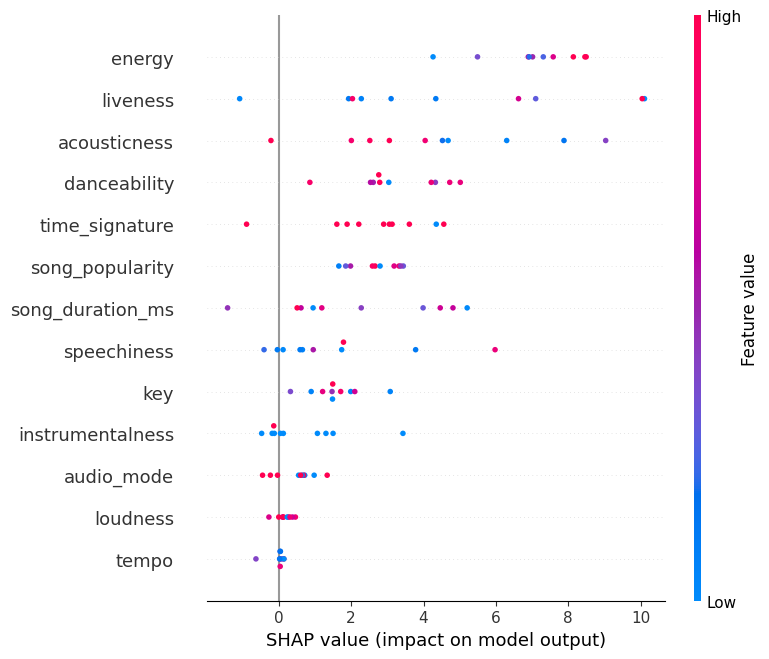

In [ ]:

# Checking if the DRF model is found
if drf_model is not None:
    # Convert the test set to H2O Frame
    test_h2o = h2o.H2OFrame(test)

    # Making predictions on the test set
    drf_preds = drf_model.predict(test_h2o)

    # Getting the contributions to each prediction from the DRF model
    drf_contribs = drf_model.predict_contributions(test_h2o[0:10, :])

    # Converting contributions to Pandas DataFrame
    drf_contribs_pd = drf_contribs.as_data_frame()

    # Converting H2O Frame to Pandas DataFrame, excluding 'song_name' column
    test_pd = pd.DataFrame(test_h2o.drop('song_name').as_data_frame())

    # Plotting SHAP summary plot for the first 10 rows, excluding 'song_name' column
    shap.summary_plot(drf_contribs_pd.drop(columns=['song_name']).values[:, :-1], test_pd.iloc[:10, :-1].reset_index(drop=True))


else:
    print("DRF model not found in the AutoML leaderboard.")

The features with the highest SHAP values are:

**energy**</br>
**Liveness**</br>
**Acousticness**</br>
**danceability**</br>
</br>**energy** songs are more likely to be popular which have energy. This could be because longer songs give listeners more songs that pump them up.

**Liveness:** Songs that are more live are more likely to be popular. This could be because live songs have a more energetic and engaging feel to them.

**Acousticness:** Songs that are more acoustic are more likely to be popular. This could be because acoustic songs are often seen as being more personal and intimate.

**danceability:** Songs that are dancable and groovy tend to be more popular.



Overall, the SHAP plot suggests that songs that are longer, more energetic, more lively, more acoustic and dancy are more likely to be popular.

**NOW LET'S PERFORM LIME ANALYSIS ON THE BEST AUTO ML MODEL THAT IS THE 'STACK ENSEMBLE MODEL'**

In [ ]:
pip install lime


In [ ]:
import lime
from lime import lime_tabular
import matplotlib.pyplot as plt
from lime import lime_tabular

In [ ]:
pip install pandas numpy scikit-learn matplotlib


In [ ]:
import h2o
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from lime.lime_tabular import LimeTabularExplainer

# Initializing H2O
h2o.init()

# Loading the dataset
url = "https://raw.githubusercontent.com/AzeemSyed123/song-popularity-predictive-mode/main/song_data.csv"
df = pd.read_csv(url)

# Handling the missing values
df.dropna(inplace=True)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         5 hours 29 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    25 days
H2O_cluster_name:           H2O_from_python_unknownUser_q0kcjy
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.505 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
# Normalizing numerical variables
data_numeric = df[['energy', 'liveness', 'speechiness', 'audio_valence', 'danceability', 'tempo', 'loudness', 'song_duration_ms']]
scaler = MinMaxScaler()
df[['energy', 'liveness', 'speechiness', 'audio_valence', 'danceability', 'tempo', 'loudness', 'song_duration_ms']] = scaler.fit_transform(data_numeric)

# Splitting the data into training and testing sets
X = df[['energy', 'liveness', 'speechiness', 'audio_valence', 'danceability', 'tempo', 'loudness', 'song_duration_ms']]
y = df['song_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Converting the data to H2OFrame
train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test_h2o = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))  # Include the target variable y_test

# Setting feature names for both training and testing H2OFrames
predictors = ['energy', 'liveness', 'speechiness', 'audio_valence', 'danceability', 'tempo', 'loudness', 'song_duration_ms']
response = 'song_popularity'
train_h2o.set_names(predictors + [response])
test_h2o.set_names(predictors + [response])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


energy    liveness    speechiness    audio_valence    danceability     tempo    loudness    song_duration_ms    song_popularity
---------  ----------  -------------  ---------------  --------------  --------  ----------  ------------------  -----------------
0.40076     0.0907599      0.0553666        0.707317         0.817629  0.484524    0.696726           0.112268                  44
0.0246811   0.0995795      0.0550478        0.0395325        0.141844  0.421995    0.219166           0.127412                  50
0.610193    0.25341        0.226355         0.675813         0.563323  0.822774    0.843531           0.0892194                 69
0.325604    0.111886       0.126461         0.496951         0.613982  0.32563     0.727753           0.12057                   65
0.494955    0.112911       0.0723698        0.477642         0.891591  0.511951    0.874582           0.110242                  59
0.86472     0.154958       0.0344315        0.905488         0.778116  0.453982    0.808441           0.0900922                 81
0.668313    0.113937       0.0475027        0.732724         0.85613   0.437512    0.794637           0.105332                  78
0.822633    0.346734       0.170032         0.895325         0.776089  0.684398    0.858474           0.123043                  91
0.849689    0.0788637      0.0569607        0.839431         0.766971  0.61917     0.87587            0.120965                  85
0.291533    0.30161        0.0398512        0.406504         0.64539   0.524167    0.757366           0.148713                  60
[3767 rows x 9 columns]

In [ ]:
# Verifying the column names and types in the training and testing sets
print("Training set columns and types:")
print(train_h2o.types)
print("Testing set columns and types:")
print(test_h2o.types)

# Training a simple model
from h2o.estimators import H2OGradientBoostingEstimator
model = H2OGradientBoostingEstimator()
model.train(x=predictors, y=response, training_frame=train_h2o)

# Getting the best model from AutoML
best_model = model

Training set columns and types:
{'energy': 'real', 'liveness': 'real', 'speechiness': 'real', 'audio_valence': 'real', 'danceability': 'real', 'tempo': 'real', 'loudness': 'real', 'song_duration_ms': 'real', 'song_popularity': 'int'}
Testing set columns and types:
{'energy': 'real', 'liveness': 'real', 'speechiness': 'real', 'audio_valence': 'real', 'danceability': 'real', 'tempo': 'real', 'loudness': 'real', 'song_duration_ms': 'real', 'song_popularity': 'int'}
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Instantiating LIME explainer
feature_names = X_train.columns.tolist()  # Use X_train for feature names
explainer = LimeTabularExplainer(X_train.values, mode="regression", feature_names=feature_names, discretize_continuous=True)

**WE WILL BE PERFORMING LIME ANALYSIS ON THE BEST MODEL THAT IS THE 'STACK ENSEMBLE MODEL'**

In [ ]:
# Choosing a data point for explainer
instance_idx = 0
instance = X_test.iloc[instance_idx].values

# Generating explanation using H2O's predict function
predictions = best_model.predict(test_h2o).as_data_frame().values.flatten()
exp = explainer.explain_instance(instance, lambda x: best_model.predict(h2o.H2OFrame(pd.DataFrame(x, columns=predictors))).as_data_frame().values.flatten(), num_features=len(feature_names))


# Visualizing explanation
exp.show_in_notebook(show_table=True, show_all=False)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


**The model is predicting a value of 29.26.**

**The most important feature contributing to this prediction is "loudness-0.70". With a positive weight of 80.07, it pushes the prediction strongly towards the positive value (29.26). This means that the louder the song, the higher the predicted value.**

**The next most important feature is "danceability>0.76".**

**Other features also have smaller influences, both positive and negative. Analyzing their positions and weights on the plot suggests a preference for moderate energy and tempos, shorter durations, less speechiness and liveness, and a slightly more positive audio valence.**

**Overall, this LIME plot suggests that the model is making its prediction based on a combination of audio features.**

**LET'S COMPARE SHAP AND LIME PLOTS**</BR></BR>
Both **SHAP** and **LIME** are popular methods for explaining machine learning models, but they have different strengths and weaknesses. Here's a quick comparison:

**SHAP**

**Strengths:**

Global and local explanations: SHAP can explain both individual predictions (local) and the overall behavior of the model (global) using summary plots and dependence plots.
Theoretically sound: SHAP values are based on Shapley values from game theory, which guarantees certain desirable properties like accuracy and consistency.
Model-agnostic: SHAP can be used with any type of machine learning model.

**Weaknesses:**

Computationally expensive: Calculating SHAP values can be slow, especially for large datasets.
Less intuitive: SHAP explanations can be complex and require some familiarity with game theory concepts.

**LIME**

**Strengths:**

Fast and easy to use: LIME is much faster than SHAP and requires minimal setup.
Intuitive explanations: LIME explanations are based on simple linear models, making them easier to understand for non-experts.
Good for individual predictions: LIME excels at explaining individual predictions and provides local fidelity, meaning the explanation is specific to the data point being analyzed.

**Weaknesses:**

Local explanations only: LIME can't explain the overall behavior of the model.
Not model-agnostic: LIME assumes a certain level of smoothness in the model's predictions, which may not hold for all models.
Less accurate: LIME explanations are not guaranteed to be as accurate as SHAP's.

**So, which is better?**

It depends on your needs. If you need to explain a single prediction quickly and intuitively, LIME might be a good choice. But if you need to understand the global behavior of the model or want more theoretically sound explanations, SHAP is the way to go.

#<b>References:<b>

1. Using SHAP values to explain how your Machine Learning model works
   (https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137)

2. Decrypting your Machine Learning model using LIME
   (https://towardsdatascience.com/decrypting-your-machine-learning-model-using-lime-5adc035109b5)

3. H20 Auto ML
   (https://h2o.ai/platform/h2o-automl/)


4. SHAP vs LIME:
   (https://towardsdatascience.com/lime-vs-shap-which-is-better-for-explaining-machine-learning-models-d68d8290bb16)

5. SHAP and LIME Python Libraries:
    (https://domino.ai/blog/shap-lime-python-libraries-part-1-great-explainers-pros-cons)
6.Explaining AI: The Key Differences Between LIME and SHAP Methods:
  (https://towardsdatascience.com/lime-vs-shap-which-is-better-for-explaining-machine-learning-models-d68d8290bb16)
    

**HOW WELL DID IT WORK?**</br>
At the end of this project, its impact is evident in the streamlined machine learning process achieved through data cleaning, feature selection, modeling, and interpretability.

**SO WHAT DID I LEARN FROM THIS?**</BR>
**1. Data Cleaning:**</br>
I learned how to clean and refine datasets, dealing with missing values, outliers, and inconsistencies. I now appreciate the importance of having high-quality data for effective machine learning.

**2. Feature Selection:**</br>

Through feature selection, I discovered the significance of picking the right features. It’s not just about optimizing model efficiency but also about preventing overfitting and focusing on the most relevant information for accurate predictions.

**3. AutoML :**</br>

AutoML showed me the power of automation in model development. It automated tasks like model selection, hyperparameter tuning, and feature engineering. This really sped up the whole process, allowing me to experiment with different configurations more efficiently.

**4. Modeling:**</br>

Building and evaluating various machine learning models taught me a lot. I got hands-on experience in developing models and a better understanding of their strengths and weaknesses. Now I can make informed decisions about which model to choose and how to optimize it.

**5. Interpretability:**</br>

Exploring model interpretability was eye-opening. I can now understand how my models make predictions and explain why certain features are important. This not only helps me trust my models more but also makes it easier to communicate their decisions to others.

**In summary, this combined process not only helped me develop a more accurate model but also gave me practical skills in data handling, feature selection, automation, and model interpretation that are invaluable for real-world machine learning applications. And at the end it worked out well.**

MIT License

Copyright (c) [2023] [Abdul Azeem Syed]

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.